# 🚀 Building Custom Language Models: From Raw Data to Production AI

In today's rapidly evolving AI landscape, the ability to create custom language models tailored to specific domains represents a **critical competitive advantage**. This comprehensive guide walks you through the complete lifecycle of building language models—from curating high-quality datasets to training and deploying powerful AI systems that deliver real business value.

Whether you're developing specialized models for healthcare, finance, legal services, or any domain requiring nuanced understanding, this tutorial provides the **practical knowledge and code examples** you need to succeed. We'll explore modern techniques using the Hugging Face ecosystem that balance efficiency, scalability, and model quality.

Based on the enhanced Chapter 11: Dataset Curation and Training Language Models from Scratch

## Introduction & Executive Summary

In today's AI-driven world, the ability to create custom language models tailored to specific domains and tasks represents a critical competitive advantage. Whether you're developing specialized models for healthcare, finance, legal services, or any domain requiring nuanced understanding, this tutorial provides the practical knowledge and code examples you need to succeed.

### 🎯 Executive Summary

Building effective custom language models depends critically on **high-quality, domain-specific data**. While full model training from scratch is rare due to cost and complexity, **fine-tuning pre-trained models** using Parameter-Efficient Fine-Tuning (PEFT) on curated datasets is now the standard.

**Key pillars for success:**
- 📊 **High-quality data** - The foundation of all great models
- ☁️ **Scalable, privacy-aware processing** - Handle big data responsibly
- 🔁 **Reproducible workflows** - Track everything for reliability
- 📈 **Iterative refinement and monitoring** - Continuous improvement

### 📚 What You'll Master:

- **Data curation fundamentals**: selecting, cleaning, and preparing domain-specific text
- **Bias detection and mitigation**: ensuring fair and ethical AI
- **Synthetic data generation**: augmenting datasets with LLM-generated examples
- **Scalable processing techniques** for handling massive datasets efficiently
- **Privacy protection and data versioning** for responsible AI development
- **Modern model architecture selection** and configuration strategies
- **Training workflows** with distributed computing and experiment tracking
- **Parameter-efficient fine-tuning methods** for adapting large models
- **Evaluation, error analysis**, and iterative improvement techniques

**Ever wondered what unique data could give your model an unstoppable edge?** 🤔

## 📑 Table of Contents

1. [Introduction & Executive Summary](#introduction--executive-summary)
2. [Environment Setup & Configuration](#environment-setup--configuration)
3. [Part 1: Data Curation - The Foundation](#part-1-data-curation---the-foundation)
   - [1.1 Basic Data Cleaning](#11-basic-data-cleaning)
   - [1.2 Scalable Text Processing](#12-scalable-text-processing)
   - [1.3 Language Detection & Filtering](#13-language-detection--filtering)
   - [1.4 Privacy Protection: PII Redaction](#14-privacy-protection-pii-redaction)
   - [1.5 Bias Detection & Mitigation](#15-bias-detection--mitigation)
   - [1.6 Synthetic Data Generation](#16-synthetic-data-generation)
4. [Part 2: Scaling Data Processing & Streaming](#part-2-scaling-data-processing--streaming)
   - [2.1 Handling Large-Scale Data](#21-handling-large-scale-data)
   - [2.2 Data Versioning & Reproducibility](#22-data-versioning--reproducibility)
5. [Part 3: Tokenization & Vocabulary Creation](#part-3-tokenization--vocabulary-creation)
   - [3.1 Training Custom Tokenizers](#31-training-custom-tokenizers)
   - [3.2 Tokenizer Comparison & Analysis](#32-tokenizer-comparison--analysis)
6. [Part 4: Model Configuration & Initialization](#part-4-model-configuration--initialization)
   - [4.1 Architecture Selection](#41-architecture-selection)
   - [4.2 Modern Model Configuration](#42-modern-model-configuration)
   - [4.3 Parameter-Efficient Fine-Tuning (PEFT)](#43-parameter-efficient-fine-tuning-peft)
7. [Part 5: Training Workflows & Evaluation](#part-5-training-workflows--evaluation)
   - [5.1 Training Setup & Monitoring](#51-training-setup--monitoring)
   - [5.2 Metrics & Early Stopping](#52-metrics--early-stopping)
   - [5.3 Error Analysis & Improvement](#53-error-analysis--improvement)
8. [Part 6: Advanced Techniques](#part-6-advanced-techniques)
   - [6.1 Few-Shot Learning](#61-few-shot-learning)
   - [6.2 Chain of Thought Reasoning](#62-chain-of-thought-reasoning)
9. [Summary & Key Takeaways](#summary--key-takeaways)
10. [Common Pitfalls & Troubleshooting](#common-pitfalls--troubleshooting)
11. [Exercises & Next Steps](#exercises--next-steps)
12. [Glossary of Terms](#glossary-of-terms)

```mermaid
flowchart LR
    subgraph Data["📊 Data Foundation"]
        A[Raw Text] --> B[Clean & Normalize]
        B --> C[Remove PII]
        C --> D[Detect Bias]
        D --> E[Augment with Synthetic]
    end
    
    subgraph Process["⚙️ Processing"]
        E --> F[Stream & Batch]
        F --> G[Version Control]
        G --> H[Tokenize]
    end
    
    subgraph Model["🤖 Model"]
        H --> I[Select Architecture]
        I --> J[Configure]
        J --> K[PEFT/LoRA]
    end
    
    subgraph Train["🚀 Training"]
        K --> L[Setup Training]
        L --> M[Monitor Metrics]
        M --> N[Iterate & Improve]
    end
    
    N --> O[Production Ready Model]
    
    style Data fill:#e1f5fe
    style Process fill:#f3e5f5
    style Model fill:#e8f5e9
    style Train fill:#fff3e0
```

## Environment Setup & Configuration

First, let's set up our environment with the necessary libraries and validate our configuration. We'll ensure we have all the tools needed for building production-ready language models.

### 🛠️ Prerequisites
- Python 3.12.9 (managed via pyenv)
- Poetry for dependency management
- GPU/MPS support recommended for faster training

### ⚠️ Important Notes on Library Versions

> **💡 Pro Tip**: Always use the latest stable Python version (3.12.9 for this project) and ensure accelerate >= 0.26.0 to avoid compatibility issues.

Due to version compatibility, we've made the following adaptations:
1. **Accelerate Version**: Ensure you have accelerate >= 0.26.0 installed
2. **Model Examples**: Using Llama-3/Gemma-2 where available, with GPT-2 as fallback
3. **Streaming**: Wikipedia dataset uses latest configs (e.g., '20240101.en')

These adaptations ensure smooth execution while maintaining all learning objectives!

In [5]:
# Core imports with comprehensive error handling
import sys
import os
from pathlib import Path
from typing import Dict, List, Optional, Tuple, Union
import warnings

# Add src to path for imports
sys.path.append(str(Path.cwd().parent / 'src'))

# Import our modules with error handling
try:
    from config import get_device, DATA_DIR, MODELS_DIR, validate_api_key
except ImportError as e:
    print(f"Warning: Could not import config module: {e}")
    # Fallback definitions
    DATA_DIR = Path.cwd() / 'data'
    MODELS_DIR = Path.cwd() / 'models'
    def get_device() -> str:
        import torch
        if torch.backends.mps.is_available():
            return "mps"
        elif torch.cuda.is_available():
            return "cuda"
        return "cpu"

# Core library imports
import torch
import transformers
import datasets
import numpy as np
import pandas as pd
from datetime import datetime

# Version checks and display
print("=" * 70)
print("🚀 Environment Configuration")
print("=" * 70)
print(f"Python version: {sys.version.split()[0]}")
print(f"PyTorch version: {torch.__version__}")
print(f"Transformers version: {transformers.__version__}")
print(f"Datasets version: {datasets.__version__}")
print(f"Device: {get_device()}")

# Check for optional libraries
optional_libs = {
    'peft': 'Parameter-Efficient Fine-Tuning',
    'langdetect': 'Language Detection',
    'fairlearn': 'Bias Detection',
    'presidio_analyzer': 'Advanced PII Detection',
    'accelerate': 'Distributed Training'
}

print("\n📦 Optional Libraries:")
for lib, description in optional_libs.items():
    try:
        __import__(lib)
        print(f"✅ {lib}: {description}")
    except ImportError:
        print(f"❌ {lib}: {description} (not installed)")

# API Key validation
print("\n🔐 API Key Configuration:")
api_keys = {
    'OPENAI_API_KEY': 'OpenAI',
    'ANTHROPIC_API_KEY': 'Anthropic',
    'HUGGINGFACE_TOKEN': 'Hugging Face'
}

for key, service in api_keys.items():
    if os.getenv(key):
        print(f"✅ {service} API key found")
    else:
        print(f"⚠️ {service} API key not found (some features may be limited)")

print("=" * 70)

🚀 Environment Configuration
Python version: 3.12.9
PyTorch version: 2.7.1
Transformers version: 4.39.3
Datasets version: 2.14.4
Device: mps

📦 Optional Libraries:
✅ peft: Parameter-Efficient Fine-Tuning
✅ langdetect: Language Detection
✅ fairlearn: Bias Detection
❌ presidio_analyzer: Advanced PII Detection (not installed)
✅ accelerate: Distributed Training

🔐 API Key Configuration:
⚠️ OpenAI API key not found (some features may be limited)
⚠️ Anthropic API key not found (some features may be limited)
⚠️ Hugging Face API key not found (some features may be limited)


/Users/richardhightower/src/art_hug_11/src/config.py:51: UserWarning: OPENAI_API_KEY not found in environment variables
  warnings.warn(f"{key_name} not found in environment variables", UserWarning)
/Users/richardhightower/src/art_hug_11/src/config.py:51: UserWarning: ANTHROPIC_API_KEY not found in environment variables
  warnings.warn(f"{key_name} not found in environment variables", UserWarning)
/Users/richardhightower/src/art_hug_11/src/config.py:51: UserWarning: HUGGINGFACE_TOKEN not found in environment variables
  warnings.warn(f"{key_name} not found in environment variables", UserWarning)


In [6]:
# Configure environment variables (if .env exists)
from dotenv import load_dotenv

# Load environment variables
if Path('.env').exists():
    load_dotenv()
    print("✅ Loaded environment variables from .env file")
else:
    print("⚠️ No .env file found. Copy .env.example to .env and add your API keys")
    print("   Example: cp ../.env.example ../.env")

# Validate API keys if needed
def check_api_key(key_name: str) -> bool:
    """Check if API key is valid (not empty or placeholder)."""
    key = os.getenv(key_name, "")
    if not key or key.startswith("your-") or key == "":
        return False
    return True

# Display API key status
for key in ['OPENAI_API_KEY', 'ANTHROPIC_API_KEY', 'HUGGINGFACE_TOKEN']:
    if check_api_key(key):
        print(f"✅ {key}: Valid")
    else:
        print(f"❌ {key}: Not configured")

⚠️ No .env file found. Copy .env.example to .env and add your API keys
   Example: cp ../.env.example ../.env
❌ OPENAI_API_KEY: Not configured
❌ ANTHROPIC_API_KEY: Not configured
❌ HUGGINGFACE_TOKEN: Not configured


## Part 1: Data Curation - The Foundation

Great language models start with great data. Picture your dataset as ingredients for a gourmet meal—the fresher and more carefully chosen, the better the final dish. **Even the most sophisticated AI architecture can't salvage a flawed foundation.**

*"Garbage in, garbage out"* remains a core truth in AI. If your dataset contains messy, biased, or irrelevant content, your model will reflect those flaws with painful accuracy.

### 🎯 In this section, you'll learn:
- ✨ Advanced text cleaning with Unicode normalization
- 🌍 Multi-language detection and filtering
- 🔒 Privacy protection with modern PII redaction
- ⚖️ Bias detection and mitigation strategies
- 🤖 Synthetic data generation for augmentation

### 1.1 Basic Data Cleaning

This example demonstrates how to clean raw text data by removing HTML tags, normalizing whitespace, and preparing it for model training.

In [7]:
# Basic Data Cleaning with Hugging Face Datasets
import re
from datasets import Dataset
from typing import Dict, Any

# Create sample data that might come from customer logs
sample_data = {
    "text": [
        "<p>Customer complaint: Product <b>broken</b></p>   Multiple   spaces!",
        "<div>Great service!</div>\n\n\nExtra newlines",
        "Normal text without HTML",
        "Text with &amp; HTML entities &lt;encoded&gt;",
        "Unicode issues: café, naïve, résumé"
    ]
}

dataset = Dataset.from_dict(sample_data)

def clean_text(example: Dict[str, Any]) -> Dict[str, Any]:
    """Clean text by removing HTML and normalizing whitespace.
    
    Args:
        example: Dictionary containing 'text' field
        
    Returns:
        Dictionary with cleaned 'text' field
    """
    try:
        text = example.get("text", "")
        
        # Decode HTML entities
        import html
        text = html.unescape(text)
        
        # Remove HTML tags
        text = re.sub(r'<.*?>', '', text)
        
        # Replace multiple spaces/newlines with a single space
        text = re.sub(r'\s+', ' ', text)
        
        # Strip leading/trailing whitespace
        text = text.strip()
        
        return {"text": text}
    except Exception as e:
        print(f"Error cleaning text: {e}")
        return {"text": example.get("text", "")}

# Apply cleaning
cleaned_dataset = dataset.map(clean_text)

print("🧹 Data Cleaning Results:")
print("=" * 60)
for i in range(len(dataset)):
    print(f"\n📝 Example {i+1}:")
    print(f"Original: {dataset[i]['text']}")
    print(f"Cleaned:  {cleaned_dataset[i]['text']}")

# Show statistics
original_chars = sum(len(ex['text']) for ex in dataset)
cleaned_chars = sum(len(ex['text']) for ex in cleaned_dataset)
print(f"\n📊 Cleaning Statistics:")
print(f"Total characters reduced: {original_chars - cleaned_chars} ({(1 - cleaned_chars/original_chars)*100:.1f}% reduction)")

Map:   0%|          | 0/5 [00:00<?, ? examples/s]

🧹 Data Cleaning Results:

📝 Example 1:
Original: <p>Customer complaint: Product <b>broken</b></p>   Multiple   spaces!
Cleaned:  Customer complaint: Product broken Multiple spaces!

📝 Example 2:
Original: <div>Great service!</div>


Extra newlines
Cleaned:  Great service! Extra newlines

📝 Example 3:
Original: Normal text without HTML
Cleaned:  Normal text without HTML

📝 Example 4:
Original: Text with &amp; HTML entities &lt;encoded&gt;
Cleaned:  Text with & HTML entities

📝 Example 5:
Original: Unicode issues: café, naïve, résumé
Cleaned:  Unicode issues: café, naïve, résumé

📊 Cleaning Statistics:
Total characters reduced: 51 (23.7% reduction)


### 1.2 Scalable Text Processing

For production systems, we need more sophisticated cleaning that can handle large datasets efficiently. This example shows Unicode normalization, URL removal, and deduplication.

> **💡 Pro Tip**: For multilingual datasets, always apply Unicode normalization (NFKC) to ensure consistent character representation.

In [8]:
# Scalable Text Cleaning and Deduplication
import unicodedata
from datasets import Dataset

# Since Wikipedia streaming has issues with local cache, let's create sample data
sample_wiki_data = {
    "text": [
        "<p>Artificial intelligence (AI) is intelligence demonstrated by machines.</p> See more at https://example.com/ai",
        "Machine learning    is a subset of AI.\n\n\nIt uses statistical techniques.",
        "Deep learning uses neural networks with multiple layers.",
        "Natural language processing (NLP) enables computers to understand human language."
    ]
}

wiki_dataset = Dataset.from_dict(sample_wiki_data)

def clean_text_advanced(example):
    """Advanced text cleaning with Unicode normalization."""
    text = unicodedata.normalize('NFKC', example['text'])  # Unicode normalization
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'https?://\S+', '', text)  # Remove URLs
    text = re.sub(r'\s+', ' ', text)  # Normalize whitespace
    text = text.strip()
    return {"text": text}

# Process examples
cleaned_wiki = wiki_dataset.map(clean_text_advanced)

print("Cleaning Wikipedia-style examples:")
for i in range(len(wiki_dataset)):
    print(f"\nExample {i+1}:")
    print(f"Original: {wiki_dataset[i]['text']}")
    print(f"Cleaned:  {cleaned_wiki[i]['text']}")

Map:   0%|          | 0/4 [00:00<?, ? examples/s]

Cleaning Wikipedia-style examples:

Example 1:
Original: <p>Artificial intelligence (AI) is intelligence demonstrated by machines.</p> See more at https://example.com/ai
Cleaned:  Artificial intelligence (AI) is intelligence demonstrated by machines. See more at

Example 2:
Original: Machine learning    is a subset of AI.


It uses statistical techniques.
Cleaned:  Machine learning is a subset of AI. It uses statistical techniques.

Example 3:
Original: Deep learning uses neural networks with multiple layers.
Cleaned:  Deep learning uses neural networks with multiple layers.

Example 4:
Original: Natural language processing (NLP) enables computers to understand human language.
Cleaned:  Natural language processing (NLP) enables computers to understand human language.


### 1.3 Language Detection and Filtering

When working with multilingual data, it's crucial to filter for your target language. This ensures model consistency and quality.

In [9]:
# Automated Language Detection and Filtering
try:
    from langdetect import detect
except ImportError:
    print("Installing langdetect...")
    import subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "langdetect"])
    from langdetect import detect

# Sample multilingual data
sample_texts = [
    "This is an English sentence.",
    "Ceci est une phrase en français.",
    "Dies ist ein deutscher Satz.",
    "This is another English example.",
    "これは日本語の文です。"
]

dataset = Dataset.from_dict({"text": sample_texts})

def filter_english(example):
    """Filter to keep only English text."""
    try:
        return detect(example['text']) == 'en'
    except:
        return False

# Filter for English only
english_dataset = dataset.filter(filter_english)

print("Language Detection Results:")
print("\nOriginal texts with detected languages:")
for text in dataset['text']:
    try:
        lang = detect(text)
    except:
        lang = "unknown"
    print(f"  [{lang}] {text}")

print("\nFiltered (English only):")
for text in english_dataset['text']:
    print(f"  {text}")

Filter:   0%|          | 0/5 [00:00<?, ? examples/s]

Language Detection Results:

Original texts with detected languages:
  [en] This is an English sentence.
  [fr] Ceci est une phrase en français.
  [de] Dies ist ein deutscher Satz.
  [en] This is another English example.
  [ja] これは日本語の文です。

Filtered (English only):
  This is an English sentence.
  This is another English example.


### 1.4 Privacy Protection: PII Redaction

When working with user data, protecting privacy is mandatory. This example shows basic PII (Personally Identifiable Information) redaction.

In [10]:
# Comprehensive PII Redaction: Protecting Privacy in Production
import re
from typing import List, Tuple, Dict, Optional

def basic_redact_pii(text: str) -> str:
    """
    Basic regex-based PII redaction - suitable for simple use cases.
    
    ⚠️ Warning: This approach has limitations:
    - May miss edge cases and variations
    - No context awareness
    - Limited to pattern matching
    
    Args:
        text: Input text to redact
        
    Returns:
        Text with basic PII patterns replaced
    """
    # Basic patterns - low recall but fast
    text = re.sub(r'[\w\.-]+@[\w\.-]+', '[EMAIL]', text)
    text = re.sub(r'\b\d{3}[-.]?\d{3}[-.]?\d{4}\b', '[PHONE]', text)
    text = re.sub(r'Mr\.\s+\w+|Ms\.\s+\w+|Dr\.\s+\w+', '[NAME]', text)
    return text

def advanced_redact_pii(text: str) -> Tuple[str, Dict[str, int]]:
    """
    Production-grade PII redaction with comprehensive patterns.
    
    This implementation handles:
    - Multiple email formats
    - Various phone number formats (US and international)
    - SSN patterns
    - Credit card numbers (basic validation)
    - IP addresses
    - Common name patterns with titles
    - Physical addresses (partial)
    
    Args:
        text: Input text to redact
        
    Returns:
        Tuple of (redacted_text, statistics_dict)
    """
    stats = {
        'emails': 0,
        'phones': 0,
        'ssns': 0,
        'credit_cards': 0,
        'names': 0,
        'ip_addresses': 0,
        'addresses': 0
    }
    
    # Apply patterns in specific order to avoid conflicts
    
    # 1. SSN pattern (must come before phone to avoid false matches)
    ssn_pattern = r'\b\d{3}-\d{2}-\d{4}\b'
    ssn_matches = len(re.findall(ssn_pattern, text))
    text = re.sub(ssn_pattern, '[SSN]', text)
    stats['ssns'] = ssn_matches
    
    # 2. Credit card pattern (basic - production should use Luhn check)
    # Matches 16 digits with optional spaces/dashes
    cc_pattern = r'\b\d{4}[\s-]?\d{4}[\s-]?\d{4}[\s-]?\d{4}\b'
    cc_matches = len(re.findall(cc_pattern, text))
    text = re.sub(cc_pattern, '[CREDIT_CARD]', text)
    stats['credit_cards'] = cc_matches
    
    # 3. Email addresses (comprehensive pattern)
    email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
    email_matches = len(re.findall(email_pattern, text))
    text = re.sub(email_pattern, '[EMAIL]', text)
    stats['emails'] = email_matches
    
    # 4. Phone numbers (multiple formats)
    phone_patterns = [
        # US formats with optional country code
        r'(?:\+?1[-.\s]?)?\(?([0-9]{3})\)?[-.\s]?([0-9]{3})[-.\s]?([0-9]{4})',
        # Basic format xxx-xxx-xxxx
        r'\b\d{3}[-.]?\d{3}[-.]?\d{4}\b',
        # With parentheses
        r'\(\d{3}\)\s*\d{3}-\d{4}',
        # International format
        r'\+\d{1,3}[-.\s]?\(?\d{1,4}\)?[-.\s]?\d{1,4}[-.\s]?\d{1,9}'
    ]
    
    phone_count = 0
    for pattern in phone_patterns:
        matches = re.findall(pattern, text)
        phone_count += len(matches)
        text = re.sub(pattern, '[PHONE]', text)
    stats['phones'] = phone_count
    
    # 5. IP addresses (IPv4)
    ip_pattern = r'\b(?:\d{1,3}\.){3}\d{1,3}\b'
    ip_matches = len(re.findall(ip_pattern, text))
    text = re.sub(ip_pattern, '[IP_ADDRESS]', text)
    stats['ip_addresses'] = ip_matches
    
    # 6. Names with titles (comprehensive list)
    titles = ['Mr', 'Ms', 'Mrs', 'Dr', 'Prof', 'Rev', 'Sr', 'Jr', 'Mx', 'Dame', 'Sir', 'Lord', 'Lady']
    title_pattern = r'\b(?:' + '|'.join(titles) + r')\.?\s+[A-Z][a-z]+(?:\s+[A-Z][a-z]+)*\b'
    name_matches = len(re.findall(title_pattern, text))
    text = re.sub(title_pattern, '[NAME]', text)
    stats['names'] = name_matches
    
    # 7. US Street addresses (partial pattern - challenging to catch all)
    address_pattern = r'\b\d+\s+[A-Z][a-z]+(?:\s+[A-Z][a-z]+)*\s+(?:Street|St|Avenue|Ave|Road|Rd|Boulevard|Blvd|Lane|Ln|Drive|Dr|Court|Ct|Circle|Cir|Plaza|Pl)\b'
    address_matches = len(re.findall(address_pattern, text, re.IGNORECASE))
    text = re.sub(address_pattern, '[ADDRESS]', text, flags=re.IGNORECASE)
    stats['addresses'] = address_matches
    
    return text, stats

def contextual_redact_pii(text: str, context: Optional[str] = None) -> str:
    """
    Context-aware PII redaction using heuristics.
    
    This approach considers the context around potential PII to reduce false positives.
    
    Args:
        text: Input text to redact
        context: Optional context type ('medical', 'financial', 'legal', etc.)
        
    Returns:
        Redacted text with context-aware replacements
    """
    # Start with advanced redaction
    redacted, stats = advanced_redact_pii(text)
    
    # Apply context-specific rules
    if context == 'medical':
        # In medical context, preserve medical record numbers but redact patient names
        # Preserve dates for medical history
        pass
    elif context == 'financial':
        # In financial context, preserve transaction IDs but redact account numbers
        # May need to preserve certain dates for audit trails
        pass
    elif context == 'legal':
        # In legal context, case numbers might look like SSNs
        # Preserve legal entity names but redact individual names
        pass
    
    return redacted

# Test samples with various PII types
test_samples = [
    # Basic examples
    "Contact Dr. Smith at dr.smith@example.com or 555-123-4567.",
    "SSN: 123-45-6789, Credit Card: 4532-1234-5678-9012",
    
    # Complex examples
    "Please email john.doe@company.com or call (555) 123-4567",
    "Ms. Johnson lives at 123 Main Street and can be reached at +1-555-123-4567",
    "Prof. Williams said to call +1 (800) 555-1234 from IP 192.168.1.1",
    
    # Edge cases
    "Email support@company.co.uk or call +44 20 7123 4567",
    "Transaction ID: 4532-1234-5678-9012 (not a credit card)",
    "Case #123-45-6789 filed by Dr. Jane Smith",
    
    # Mixed content
    "Patient John Doe (SSN: 987-65-4321) visited Dr. Sarah Johnson at 456 Oak Avenue. Contact: jdoe@email.com, (555) 987-6543"
]

print("🔒 PII Redaction Examples - Basic vs Advanced vs Context-Aware")
print("=" * 80)

for i, sample in enumerate(test_samples):
    print(f"\n📝 Example {i+1}:")
    print(f"Original:    {sample}")
    print(f"Basic:       {basic_redact_pii(sample)}")
    
    advanced, stats = advanced_redact_pii(sample)
    print(f"Advanced:    {advanced}")
    
    # Show statistics for interesting cases
    if sum(stats.values()) > 2:
        print(f"Statistics:  {', '.join([f'{k}: {v}' for k, v in stats.items() if v > 0])}")

print("\n" + "=" * 80)
print("🎯 PII Redaction Best Practices for Production")
print("=" * 80)

print("""
1. **Use Specialized Libraries**:
   • presidio-analyzer: Microsoft's PII detection with ML models
   • scrubadub: Extensible with custom detectors
   • spacy + custom NER: Train on your specific domain

2. **Validation & Testing**:
   • Create comprehensive test suites with edge cases
   • Measure precision AND recall
   • Test with real-world data samples
   • Regular audits of redaction effectiveness

3. **Context Awareness**:
   • Different domains have different PII patterns
   • Medical: Patient names, medical record numbers
   • Financial: Account numbers, transaction IDs
   • Legal: Case numbers, party names

4. **Common Pitfalls to Avoid**:
   ❌ Over-redaction: Removing non-PII that looks similar
   ❌ Under-redaction: Missing variations and edge cases
   ❌ Pattern conflicts: SSN pattern matching phone numbers
   ❌ International formats: US-centric patterns missing global PII

5. **Performance Considerations**:
   • Regex can be slow on large texts
   • Consider using Aho-Corasick for multiple pattern matching
   • Cache compiled regex patterns
   • Process in chunks for very large documents

6. **Legal & Compliance**:
   • GDPR: "Reasonable" efforts required
   • HIPAA: Specific list of 18 identifiers
   • CCPA: California-specific requirements
   • Industry-specific regulations
""")

# Advanced example: Using transformer-based detection
print("\n" + "=" * 80)
print("🚀 Advanced PII Detection with Transformers")
print("=" * 80)

print("""
For production systems, consider transformer-based approaches:

```python
# Example using Microsoft Presidio
from presidio_analyzer import AnalyzerEngine
from presidio_anonymizer import AnonymizerEngine

analyzer = AnalyzerEngine()
anonymizer = AnonymizerEngine()

# Analyze text
results = analyzer.analyze(
    text="John Smith's phone is 555-123-4567",
    language='en'
)

# Anonymize
anonymized = anonymizer.anonymize(
    text=text,
    analyzer_results=results
)
```

Advantages:
✅ Context-aware detection
✅ Multi-language support
✅ Confidence scores
✅ Custom entity training
✅ Handles complex patterns

Try it: pip install presidio-analyzer presidio-anonymizer
""")

# Performance comparison mockup
print("\n" + "=" * 80)
print("📊 PII Redaction Method Comparison")
print("=" * 80)

comparison_data = {
    "Method": ["Basic Regex", "Advanced Regex", "Presidio (NER)", "Custom LLM"],
    "Precision": ["70%", "85%", "92%", "95%"],
    "Recall": ["60%", "80%", "88%", "93%"],
    "Speed": ["1000 docs/sec", "500 docs/sec", "50 docs/sec", "10 docs/sec"],
    "Setup": ["Simple", "Moderate", "Complex", "Very Complex"],
    "Cost": ["Free", "Free", "Free", "API costs"]
}

# Display as formatted table
for key in comparison_data:
    print(f"{key:<15}", end="")
    for value in comparison_data[key]:
        print(f"{value:<20}", end="")
    print()

print("\n💡 Recommendation: Start with advanced regex, upgrade to Presidio for production")

🔒 PII Redaction Examples - Basic vs Advanced vs Context-Aware

📝 Example 1:
Original:    Contact Dr. Smith at dr.smith@example.com or 555-123-4567.
Basic:       Contact [NAME] at [EMAIL] or [PHONE].
Advanced:    Contact [NAME] at [EMAIL] or [PHONE].
Statistics:  emails: 1, phones: 1, names: 1

📝 Example 2:
Original:    SSN: 123-45-6789, Credit Card: 4532-1234-5678-9012
Basic:       SSN: 123-45-6789, Credit Card: 4532-1234-5678-9012
Advanced:    SSN: [SSN], Credit Card: [CREDIT_CARD]

📝 Example 3:
Original:    Please email john.doe@company.com or call (555) 123-4567
Basic:       Please email [EMAIL] or call (555) 123-4567
Advanced:    Please email [EMAIL] or call [PHONE]

📝 Example 4:
Original:    Ms. Johnson lives at 123 Main Street and can be reached at +1-555-123-4567
Basic:       [NAME] lives at 123 Main Street and can be reached at +1-[PHONE]
Advanced:    [NAME] lives at [ADDRESS] and can be reached at [PHONE]
Statistics:  phones: 1, names: 1, addresses: 1

📝 Example 5:
Original:  

### 1.5 Bias Detection & Mitigation

Beyond accuracy, ensuring fairness and ethical AI requires proactive bias detection. Models trained on biased data perpetuate and amplify societal inequalities.

> **⚖️ Key Principle**: Bias in data leads to bias in models. Always audit your datasets for representation gaps and demographic disparities.

In [11]:
# Bias Detection and Mitigation Example
try:
    from fairlearn.metrics import MetricFrame
    from sklearn.metrics import accuracy_score
    fairlearn_available = True
except ImportError:
    fairlearn_available = False
    print("⚠️ Fairlearn not installed. Using mock example.")
    print("   Install with: pip install fairlearn scikit-learn")

# Create a sample dataset with potential bias
sample_predictions = pd.DataFrame({
    'text': [
        'Software engineer position available',
        'Nursing position open',
        'CEO role for experienced leader',
        'Secretary needed for office',
        'Data scientist role',
        'Teacher position at school'
    ],
    'true_label': [1, 1, 1, 1, 1, 1],  # All are job postings
    'predicted': [1, 1, 1, 0, 1, 0],   # Model predictions
    'occupation_type': ['tech', 'healthcare', 'executive', 'admin', 'tech', 'education'],
    'gender_bias_risk': ['low', 'high', 'high', 'high', 'low', 'medium']
})

print("⚖️ Bias Detection Analysis")
print("=" * 70)
print("\n📊 Sample Dataset:")
print(sample_predictions[['text', 'predicted', 'occupation_type', 'gender_bias_risk']])

if fairlearn_available:
    # Analyze bias across occupation types
    metric_frame = MetricFrame(
        metrics=accuracy_score,
        y_true=sample_predictions['true_label'],
        y_pred=sample_predictions['predicted'],
        sensitive_features=sample_predictions['occupation_type']
    )
    
    print("\n📈 Performance by Occupation Type:")
    print(metric_frame.by_group)
    
    # Calculate disparity
    disparity = metric_frame.difference(method='between_groups')
    print(f"\n⚠️ Maximum accuracy disparity: {disparity:.2f}")
else:
    # Manual bias analysis
    print("\n📈 Manual Bias Analysis:")
    for occ_type in sample_predictions['occupation_type'].unique():
        mask = sample_predictions['occupation_type'] == occ_type
        acc = (sample_predictions[mask]['true_label'] == 
                sample_predictions[mask]['predicted']).mean()
        print(f"  {occ_type}: {acc:.2%} accuracy")

print("\n🎯 Bias Mitigation Strategies:")
print("  ✅ Audit data sources for representation gaps")
print("  ✅ Rebalance datasets to ensure fair representation")
print("  ✅ Use targeted augmentation for underrepresented groups")
print("  ✅ Monitor fairness metrics throughout training")
print("  ✅ Involve diverse stakeholders in data curation")

# Demonstrate text augmentation for bias mitigation
def mitigate_gender_bias(text: str) -> List[str]:
    """Generate gender-neutral variations of text."""
    variations = [text]
    
    # Simple pronoun swapping (production should use more sophisticated methods)
    gendered_terms = {
        'he': ['they', 'she'],
        'his': ['their', 'her'],
        'him': ['them', 'her'],
        'chairman': ['chairperson', 'chair'],
        'businessman': ['businessperson', 'business professional'],
        'salesman': ['salesperson', 'sales professional']
    }
    
    for term, replacements in gendered_terms.items():
        if term in text.lower():
            for replacement in replacements:
                variations.append(text.lower().replace(term, replacement))
    
    return list(set(variations))

# Example of bias mitigation through augmentation
test_text = "The chairman announced his decision"
variations = mitigate_gender_bias(test_text)
print(f"\n🔄 Bias Mitigation through Augmentation:")
print(f"Original: {test_text}")
print(f"Variations: {variations}")

⚖️ Bias Detection Analysis

📊 Sample Dataset:
                                   text  predicted occupation_type  \
0  Software engineer position available          1            tech   
1                 Nursing position open          1      healthcare   
2       CEO role for experienced leader          1       executive   
3           Secretary needed for office          0           admin   
4                   Data scientist role          1            tech   
5            Teacher position at school          0       education   

  gender_bias_risk  
0              low  
1             high  
2             high  
3             high  
4              low  
5           medium  

📈 Performance by Occupation Type:
occupation_type
admin         0.0
education     0.0
executive     1.0
healthcare    1.0
tech          1.0
Name: accuracy_score, dtype: float64

⚠️ Maximum accuracy disparity: 1.00

🎯 Bias Mitigation Strategies:
  ✅ Audit data sources for representation gaps
  ✅ Rebalance datasets 

### 1.6 Synthetic Data Generation

In data-scarce domains or when dealing with privacy constraints, synthetic data generation provides a powerful augmentation strategy. Modern LLMs can generate high-quality training examples that maintain semantic coherence while expanding dataset diversity.

> **🤖 Pro Tip**: Mix synthetic and real data in a 20-30% ratio for optimal results. Always validate synthetic examples against real data distributions.

In [12]:
# Synthetic Data Generation for Enhanced Training
from transformers import pipeline
import random

# Initialize text generation pipeline (using smaller model for demo)
try:
    generator = pipeline("text-generation", model="gpt2", device=-1)
    generator_available = True
except Exception as e:
    generator_available = False
    print(f"⚠️ Could not load generator: {e}")

def generate_synthetic_examples(
    prompt_template: str, 
    num_examples: int = 5, 
    categories: Optional[List[str]] = None,
    max_length: int = 100
) -> List[Dict[str, str]]:
    """Generate synthetic training examples using LLM-based augmentation."""
    synthetic_data = []
    
    if not generator_available:
        # Fallback: Create template-based examples
        templates = [
            "The patient experienced {symptom} and required {treatment}.",
            "Customer reported {issue} with {product}.",
            "Analysis shows {finding} in {domain}."
        ]
        
        symptoms = ["fever", "headache", "fatigue", "chest pain"]
        treatments = ["medication", "rest", "monitoring", "intervention"]
        
        for i in range(num_examples):
            template = random.choice(templates)
            if "{symptom}" in template:
                text = template.format(
                    symptom=random.choice(symptoms),
                    treatment=random.choice(treatments)
                )
            else:
                text = template.format(
                    issue="performance degradation",
                    product="software system",
                    finding="anomalous patterns",
                    domain="data analysis"
                )
            
            synthetic_data.append({
                'text': text,
                'category': categories[i % len(categories)] if categories else 'general',
                'synthetic': True
            })
    else:
        # Use LLM for generation
        for i in range(num_examples):
            if categories:
                category = random.choice(categories)
                prompt = prompt_template.format(category=category)
            else:
                prompt = prompt_template
            
            # Generate with controlled randomness
            result = generator(
                prompt,
                max_length=max_length,
                temperature=0.8,
                do_sample=True,
                top_p=0.9,
                pad_token_id=generator.tokenizer.eos_token_id
            )
            
            generated_text = result[0]['generated_text']
            # Extract only the new content (remove prompt)
            new_content = generated_text[len(prompt):].strip()
            
            synthetic_data.append({
                'text': new_content if new_content else generated_text,
                'category': category if categories else 'general',
                'synthetic': True
            })
    
    return synthetic_data

# Example: Generate customer support queries
prompt_template = "Generate a realistic customer support query about {category}:"
categories = ["billing", "technical issues", "account access", "feature requests"]

print("🤖 Synthetic Data Generation Examples:")
print("=" * 70)

synthetic_examples = generate_synthetic_examples(
    prompt_template, 
    num_examples=4, 
    categories=categories,
    max_length=80
)

for i, example in enumerate(synthetic_examples):
    print(f"\n📝 Synthetic Example {i+1} ({example['category']}):")
    print(f"Text: {example['text']}")

# Demonstrate mixing synthetic with real data
real_data = [
    {'text': 'I cannot log into my account', 'category': 'account access', 'synthetic': False},
    {'text': 'My bill is incorrect this month', 'category': 'billing', 'synthetic': False},
    {'text': 'The app crashes on startup', 'category': 'technical issues', 'synthetic': False}
]

# Mix datasets
mixed_dataset = real_data + synthetic_examples
synthetic_ratio = sum(1 for ex in mixed_dataset if ex['synthetic']) / len(mixed_dataset)

print(f"\n📊 Dataset Composition:")
print(f"  Real examples: {len(real_data)}")
print(f"  Synthetic examples: {len(synthetic_examples)}")
print(f"  Synthetic ratio: {synthetic_ratio:.1%}")

print("\n✅ Best Practices for Synthetic Data:")
print("  • Validate against real data distributions")
print("  • Monitor model performance on held-out real data")
print("  • Document generation process for reproducibility")
print("  • Ensure synthetic data doesn't leak sensitive patterns")

# Try This: Experiment with different prompts
print("\n🎯 Try This: Modify the prompt template to generate domain-specific examples!")
print("Example prompts:")
print("  - 'Write a medical diagnosis for a patient with {symptom}:'")
print("  - 'Create a legal contract clause about {topic}:'")

/Users/richardhightower/src/art_hug_11/.venv/lib/python3.12/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


🤖 Synthetic Data Generation Examples:

📝 Synthetic Example 1 (feature requests):
Text: use Symfony\Component\Framework\V1\Framework\V1\Support\V1\Support\V1\Support\V1\Support\V1\Support\V1\Support\V1\Support\V1\Support\V1\Support\V1\Support\V

📝 Synthetic Example 2 (billing):
Text: https://github.com/joshjosh/reduced-requests

Reduce the number of requests sent using a request to be processed: https://github.com/joshjosh/reduced-requests

Reduce the amount of requests sent using a request to be processed: https://github.com/

📝 Synthetic Example 3 (billing):
Text: { "userId": "1", "providerId": "3", "version": "1.2", "requestId": "1.0.0.0", "userName": "admin", "userEmail": "admin@example.com", "usersHtml": { "title": "admin", "

📝 Synthetic Example 4 (technical issues):
Text: // This is the primary way we use the Customer Support service. Console.WriteLine("You have an issue with an existing customer support request. You need to send it to the Customer Support team, which will respon

## Part 2: Scaling Data Processing & Streaming

As your projects grow, so do your datasets—sometimes reaching terabytes or more. Loading all this data at once resembles trying to cook every dish in a restaurant simultaneously: the kitchen will grind to a halt. Instead, you need smart, scalable workflows.

### 2.1 Handling Large-Scale Data

When working with massive datasets, streaming allows you to process data without loading everything into memory. Data streaming lets you process one record at a time, or in manageable batches, keeping only a small portion in memory.

In [13]:
# Streaming and Batch Processing Example
def process_batch(batch):
    """Process a batch of examples - here we truncate text."""
    return {"processed_text": [t[:200] if len(t) > 200 else t for t in batch["text"]]}

# Create a larger sample dataset to demonstrate batching
large_sample_data = {
    "text": [
        "The development of artificial intelligence has revolutionized many industries. " * 10,
        "Machine learning algorithms can learn from data without explicit programming. " * 10,
        "Deep neural networks have achieved state-of-the-art results in computer vision. " * 10,
        "Natural language processing enables machines to understand and generate human text. " * 10,
        "Reinforcement learning allows agents to learn through interaction with environments. " * 10,
    ]
}

large_dataset = Dataset.from_dict(large_sample_data)

# Process data in batches
processed = large_dataset.map(process_batch, batched=True, batch_size=2)

print("Batch Processing Example:")
print("Processing examples (truncated to 200 chars):\n")

for i, example in enumerate(processed):
    print(f"Example {i+1}:")
    print(f"Original length: {len(large_dataset[i]['text'])} chars")
    print(f"Processed (first 100 chars): {example['processed_text'][:100]}...")
    print(f"Processed length: {len(example['processed_text'])} chars\n")

Map:   0%|          | 0/5 [00:00<?, ? examples/s]

Batch Processing Example:
Processing examples (truncated to 200 chars):

Example 1:
Original length: 790 chars
Processed (first 100 chars): The development of artificial intelligence has revolutionized many industries. The development of ar...
Processed length: 200 chars

Example 2:
Original length: 780 chars
Processed (first 100 chars): Machine learning algorithms can learn from data without explicit programming. Machine learning algor...
Processed length: 200 chars

Example 3:
Original length: 800 chars
Processed (first 100 chars): Deep neural networks have achieved state-of-the-art results in computer vision. Deep neural networks...
Processed length: 200 chars

Example 4:
Original length: 840 chars
Processed (first 100 chars): Natural language processing enables machines to understand and generate human text. Natural language...
Processed length: 200 chars

Example 5:
Original length: 850 chars
Processed (first 100 chars): Reinforcement learning allows agents to learn through intera

### 2.2 Data Versioning & Reproducibility

In professional AI projects, you must know exactly what data went into your model and how it was processed. Consider this as keeping a precise recipe—so you (or your team) can always recreate results or explain decisions.

> **🔖 Key Principle**: Track every change to your data just like you track code changes. Data versioning is essential for reproducible ML.

In [14]:
# Data Versioning and Reproducibility Example
import hashlib
import json
from datetime import datetime

class DataVersionTracker:
    """Simple data versioning system for reproducibility."""
    
    def __init__(self):
        self.versions = []
        
    def create_version(
        self, 
        data: Any, 
        processing_steps: List[str],
        metadata: Optional[Dict] = None
    ) -> str:
        """Create a versioned snapshot of data and processing."""
        # Calculate data hash
        if isinstance(data, pd.DataFrame):
            data_str = data.to_json()
        elif isinstance(data, list):
            data_str = json.dumps(data, sort_keys=True)
        else:
            data_str = str(data)
            
        data_hash = hashlib.sha256(data_str.encode()).hexdigest()[:16]
        
        # Create version entry
        version = {
            'version_id': f"v_{datetime.now().strftime('%Y%m%d_%H%M%S')}_{data_hash}",
            'timestamp': datetime.now().isoformat(),
            'data_hash': data_hash,
            'processing_steps': processing_steps,
            'metadata': metadata or {},
            'data_shape': getattr(data, 'shape', len(data) if isinstance(data, list) else None)
        }
        
        self.versions.append(version)
        return version['version_id']
    
    def get_lineage(self) -> pd.DataFrame:
        """Get the complete data lineage."""
        return pd.DataFrame(self.versions)

# Example usage
tracker = DataVersionTracker()

# Track initial raw data
raw_data = ["Sample text 1", "Sample text 2", "Sample text 3"]
v1 = tracker.create_version(
    data=raw_data,
    processing_steps=["Loaded from source"],
    metadata={'source': 'customer_logs.csv', 'rows': len(raw_data)}
)

# Track after cleaning
cleaned_data = [text.lower().strip() for text in raw_data]
v2 = tracker.create_version(
    data=cleaned_data,
    processing_steps=["Loaded from source", "Applied text cleaning"],
    metadata={'cleaning_method': 'lowercase_and_strip'}
)

# Track after filtering
filtered_data = [text for text in cleaned_data if len(text) > 10]
v3 = tracker.create_version(
    data=filtered_data,
    processing_steps=["Loaded from source", "Applied text cleaning", "Filtered by length"],
    metadata={'filter_criteria': 'length > 10'}
)

print("📊 Data Versioning Example")
print("=" * 70)

# Show lineage
lineage = tracker.get_lineage()
print("\n🔍 Data Lineage:")
for _, version in lineage.iterrows():
    print(f"\n📌 {version['version_id']}")
    print(f"   Timestamp: {version['timestamp']}")
    print(f"   Hash: {version['data_hash']}")
    print(f"   Shape: {version['data_shape']}")
    print(f"   Steps: {' → '.join(version['processing_steps'])}")

print("\n🛠️ Production Data Versioning Tools:")
print("  • DVC (Data Version Control): Git-like versioning for data")
print("  • LakeFS: Data lake with Git-like operations")
print("  • Delta Lake: ACID transactions for big data")
print("  • Weights & Biases: Experiment tracking with data versioning")

# Demonstrate reproducibility
print("\n🔄 Reproducibility Check:")
print(f"To reproduce model trained with {v3}:")
print(f"  1. Checkout data version: {v3}")
print(f"  2. Apply processing: {tracker.versions[-1]['processing_steps']}")
print(f"  3. Use metadata: {tracker.versions[-1]['metadata']}")

📊 Data Versioning Example

🔍 Data Lineage:

📌 v_20250730_123034_1006e09bdda96243
   Timestamp: 2025-07-30T12:30:34.648497
   Hash: 1006e09bdda96243
   Shape: 3
   Steps: Loaded from source

📌 v_20250730_123034_4b08911a4d1e5415
   Timestamp: 2025-07-30T12:30:34.648562
   Hash: 4b08911a4d1e5415
   Shape: 3
   Steps: Loaded from source → Applied text cleaning

📌 v_20250730_123034_4b08911a4d1e5415
   Timestamp: 2025-07-30T12:30:34.648617
   Hash: 4b08911a4d1e5415
   Shape: 3
   Steps: Loaded from source → Applied text cleaning → Filtered by length

🛠️ Production Data Versioning Tools:
  • DVC (Data Version Control): Git-like versioning for data
  • LakeFS: Data lake with Git-like operations
  • Delta Lake: ACID transactions for big data
  • Weights & Biases: Experiment tracking with data versioning

🔄 Reproducibility Check:
To reproduce model trained with v_20250730_123034_4b08911a4d1e5415:
  1. Checkout data version: v_20250730_123034_4b08911a4d1e5415
  2. Apply processing: ['Loaded from 

<cell_type>markdown</cell_type>## Part 3: Tokenization & Vocabulary Creation

Clean, labeled data is almost ready—but models can't use raw text. They need tokens: units like words, subwords, or characters. Tokenization bridges the gap.

### 3.1 Training Custom Tokenizers

For specialized domains, training a custom tokenizer can dramatically improve model performance by ensuring important terms aren't fragmented.

> **🔤 Key Concept**: Domain-specific tokenizers learn to keep medical terms like "electrocardiogram" as single tokens instead of breaking them into meaningless subwords. This leads to better understanding and more efficient processing.

In this section, we'll train a medical BPE (Byte-Pair Encoding) tokenizer that:
- Preserves medical terminology intact
- Reduces token count by up to 50% for medical text
- Improves model context window utilization
- Handles both common and rare medical terms effectively

In [15]:
# Training a Custom Medical Tokenizer with BPE
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List
from tokenizers import Tokenizer, models, pre_tokenizers, trainers, processors

def load_medical_corpus(max_samples: int = 10000) -> List[str]:
    """
    Load medical text data from available sources
    """
    corpus = []
    
    try:
        # Try to load PubMed dataset from Hugging Face
        from datasets import load_dataset
        print("Loading PubMed abstracts from Hugging Face...")
        
        # Load pubmed_qa dataset which contains medical Q&A pairs
        dataset = load_dataset("pubmed_qa", "pqa_labeled", split="train", streaming=True)
        
        count = 0
        for example in dataset:
            # Extract context (which contains medical abstracts)
            if 'context' in example and 'contexts' in example['context']:
                for context in example['context']['contexts']:
                    corpus.append(context)
                    count += 1
                    if count >= max_samples:
                        break
            if count >= max_samples:
                break
                
        print(f"Loaded {len(corpus)} medical abstracts from PubMed QA")
        
    except Exception as e:
        print(f"Could not load PubMed dataset: {e}")
        print("Falling back to comprehensive synthetic medical corpus...")
        
        # Fallback: Create a comprehensive synthetic medical corpus
        # This is still much better than the tiny original corpus
        medical_texts = [
            # Cardiology
            "The patient presented with acute myocardial infarction characterized by ST-segment elevation on electrocardiogram. Immediate percutaneous coronary intervention was performed.",
            "Diagnosis of acute coronary syndrome requires evaluation of troponin levels, electrocardiogram changes, and clinical presentation. Thrombolytic therapy may be indicated.",
            "Coronary angioplasty with stent placement is the preferred treatment for ST-elevation myocardial infarction when performed within the appropriate time window.",
            "Atherosclerotic cardiovascular disease remains the leading cause of mortality worldwide. Risk factors include hypertension, hyperlipidemia, and diabetes mellitus.",
            "Cardiac catheterization revealed significant stenosis in the left anterior descending artery requiring percutaneous coronary intervention.",
            
            # Neurology  
            "The patient exhibited symptoms consistent with acute ischemic stroke including hemiparesis, aphasia, and facial droop. Immediate neuroimaging was performed.",
            "Magnetic resonance imaging revealed an infarct in the middle cerebral artery territory. Thrombolytic therapy was administered within the therapeutic window.",
            "Differential diagnosis for altered mental status includes metabolic encephalopathy, infectious processes, and structural brain lesions.",
            "Electroencephalogram monitoring showed epileptiform discharges consistent with temporal lobe epilepsy. Antiepileptic therapy was initiated.",
            
            # Oncology
            "Histopathological examination revealed invasive ductal carcinoma with positive estrogen and progesterone receptors. Adjuvant chemotherapy was recommended.",
            "Immunohistochemistry staining showed overexpression of HER2/neu protein. Targeted therapy with trastuzumab was initiated.",
            "Positron emission tomography scan demonstrated hypermetabolic lesions consistent with metastatic disease. Palliative radiotherapy was considered.",
            
            # Infectious Disease
            "The patient presented with fever, productive cough, and consolidation on chest radiograph consistent with community-acquired pneumonia.",
            "Blood cultures grew methicillin-resistant Staphylococcus aureus. Intravenous vancomycin therapy was initiated with therapeutic drug monitoring.",
            "Polymerase chain reaction testing confirmed the presence of Mycobacterium tuberculosis. Four-drug antituberculous therapy was started.",
            
            # Endocrinology
            "Laboratory findings revealed elevated hemoglobin A1c and fasting glucose levels consistent with diabetes mellitus type 2. Metformin therapy was initiated.",
            "Thyroid function tests showed suppressed thyroid-stimulating hormone with elevated free thyroxine consistent with hyperthyroidism.",
            "Adrenal insufficiency was confirmed by cosyntropin stimulation test. Hydrocortisone replacement therapy was prescribed.",
            
            # Pulmonology
            "Pulmonary function tests revealed obstructive pattern with reduced forced expiratory volume consistent with chronic obstructive pulmonary disease.",
            "High-resolution computed tomography showed ground-glass opacities and interstitial changes consistent with idiopathic pulmonary fibrosis.",
            "Bronchoscopy with bronchoalveolar lavage was performed to evaluate for infectious etiology of pneumonia.",
            
            # Gastroenterology
            "Esophagogastroduodenoscopy revealed erosive esophagitis and hiatal hernia. Proton pump inhibitor therapy was prescribed.",
            "Colonoscopy showed multiple adenomatous polyps which were removed endoscopically. Surveillance colonoscopy was recommended.",
            "Liver biopsy demonstrated bridging fibrosis consistent with chronic hepatitis C infection. Antiviral therapy was initiated.",
            
            # Rheumatology
            "The patient met classification criteria for rheumatoid arthritis with symmetric polyarthritis and positive rheumatoid factor.",
            "Synovial fluid analysis showed inflammatory arthritis with elevated white blood cell count and negative crystals.",
            "Disease-modifying antirheumatic drug therapy with methotrexate was initiated for treatment of rheumatoid arthritis.",
            
            # Nephrology
            "Renal biopsy showed focal segmental glomerulosclerosis. Immunosuppressive therapy with corticosteroids was initiated.",
            "The patient developed acute kidney injury secondary to contrast-induced nephropathy. Supportive care with hydration was provided.",
            "Chronic kidney disease stage 4 was diagnosed based on estimated glomerular filtration rate. Preparation for renal replacement therapy was discussed.",
            
            # Hematology
            "Bone marrow biopsy revealed acute myeloid leukemia with complex cytogenetics. Induction chemotherapy was recommended.",
            "Flow cytometry confirmed the diagnosis of chronic lymphocytic leukemia. Watch and wait approach was adopted.",
            "The patient presented with thrombocytopenia and microangiopathic hemolytic anemia consistent with thrombotic thrombocytopenic purpura."
        ]
        
        # Repeat each text multiple times with variations
        for text in medical_texts:
            # Add original
            corpus.append(text)
            
            # Add variations
            corpus.append(text.lower())
            corpus.append(text.upper())
            
            # Add with common medical prefixes/suffixes
            corpus.append(f"Clinical presentation: {text}")
            corpus.append(f"Diagnosis: {text}")
            corpus.append(f"Treatment plan: {text}")
            corpus.append(f"{text} Follow-up recommended.")
            corpus.append(f"Patient history: {text}")
            
        # Add individual medical terms repeated many times
        important_terms = [
            "myocardial infarction", "acute coronary syndrome", "percutaneous coronary intervention",
            "electrocardiogram", "thrombolytic therapy", "cardiac catheterization", "angioplasty",
            "atherosclerosis", "hypertension", "hyperlipidemia", "diabetes mellitus",
            "cerebrovascular accident", "ischemic stroke", "hemorrhagic stroke", "thrombectomy",
            "magnetic resonance imaging", "computed tomography", "positron emission tomography",
            "chemotherapy", "radiotherapy", "immunotherapy", "targeted therapy",
            "metastasis", "carcinoma", "lymphoma", "leukemia", "oncogene",
            "pneumonia", "tuberculosis", "sepsis", "antibiotic", "vancomycin",
            "diabetes", "insulin", "metformin", "hemoglobin A1c", "glucose",
            "hypothyroidism", "hyperthyroidism", "thyroid stimulating hormone",
            "chronic obstructive pulmonary disease", "asthma", "pulmonary fibrosis",
            "gastroesophageal reflux", "inflammatory bowel disease", "cirrhosis",
            "rheumatoid arthritis", "systemic lupus erythematosus", "osteoarthritis",
            "chronic kidney disease", "dialysis", "glomerulonephritis", "nephropathy",
            "anemia", "thrombocytopenia", "coagulopathy", "hemophilia"
        ]
        
        # Add each term many times in different contexts
        for term in important_terms:
            for i in range(20):  # Repeat each term 20 times
                corpus.append(term)
                corpus.append(f"The patient has {term}.")
                corpus.append(f"Diagnosis of {term} was confirmed.")
                corpus.append(f"Treatment for {term} includes multiple modalities.")
                corpus.append(f"{term} is a common medical condition.")
        
    return corpus

# Load medical corpus
print("Loading medical corpus for tokenizer training...")
medical_corpus = load_medical_corpus(max_samples=5000)
print(f"\nCorpus statistics:")
print(f"- Total documents: {len(medical_corpus)}")
print(f"- Average length: {np.mean([len(doc.split()) for doc in medical_corpus]):.1f} words")
print(f"- Total words: {sum(len(doc.split()) for doc in medical_corpus):,}")

# Show sample entries
print("\nSample corpus entries:")
for i in range(min(3, len(medical_corpus))):
    print(f"{i+1}. {medical_corpus[i][:150]}...")

# Train improved tokenizer with BPE on medical corpus
def train_medical_tokenizer(corpus: List[str], vocab_size: int = 10000) -> Tokenizer:
    """
    Train a BPE tokenizer optimized for medical text
    """
    # Use BPE model which is better for subword tokenization
    tokenizer = Tokenizer(models.BPE(unk_token="<unk>"))
    
    # Use ByteLevel pre-tokenizer (like GPT-2)
    tokenizer.pre_tokenizer = pre_tokenizers.ByteLevel(add_prefix_space=False)
    
    # Special tokens
    special_tokens = ["<pad>", "<unk>", "<s>", "</s>", "<mask>"]
    
    # Train with BPE
    trainer = trainers.BpeTrainer(
        vocab_size=vocab_size,
        special_tokens=special_tokens,
        min_frequency=2,  # Only create tokens appearing at least twice
        show_progress=True
    )
    
    # Train on the medical corpus
    print(f"\nTraining BPE tokenizer with vocab_size={vocab_size}...")
    tokenizer.train_from_iterator(corpus, trainer=trainer)
    
    # Add post-processing
    tokenizer.post_processor = processors.ByteLevel(trim_offsets=False)
    
    return tokenizer

# Train the tokenizer
custom_tokenizer = train_medical_tokenizer(medical_corpus, vocab_size=10000)

# Save the tokenizer
tokenizer_path = DATA_DIR / "medical_tokenizer.json"
DATA_DIR.mkdir(parents=True, exist_ok=True)  # Ensure directory exists
custom_tokenizer.save(str(tokenizer_path))

# Load into Hugging Face
from transformers import PreTrainedTokenizerFast
custom_tokenizer_hf = PreTrainedTokenizerFast(tokenizer_file=str(tokenizer_path))
custom_tokenizer_hf.pad_token = "<pad>"

print(f"\n✅ Medical tokenizer saved to {tokenizer_path}")
print(f"Vocabulary size: {custom_tokenizer_hf.vocab_size}")

# Quick test on medical terms
test_terms = ["myocardial infarction", "electrocardiogram", "percutaneous coronary intervention"]
print("\nQuick tokenization test:")
for term in test_terms:
    tokens = custom_tokenizer.encode(term).tokens
    print(f"'{term}' -> {len(tokens)} tokens: {tokens}")

# Demonstrate the importance of domain-specific tokenization
print("\n💡 Why Domain-Specific Tokenization Matters:")
print("- Medical terms stay intact (e.g., 'electrocardiogram' as 1 token)")
print("- Better context understanding (fewer tokens = more room for context)")
print("- Improved efficiency (reduced computational costs)")
print("- More accurate representations of domain concepts")

Loading medical corpus for tokenizer training...
Loading PubMed abstracts from Hugging Face...
Could not load PubMed dataset: Invalid pattern: '**' can only be an entire path component
Falling back to comprehensive synthetic medical corpus...

Corpus statistics:
- Total documents: 5964
- Average length: 5.5 words
- Total words: 32,705

Sample corpus entries:
1. The patient presented with acute myocardial infarction characterized by ST-segment elevation on electrocardiogram. Immediate percutaneous coronary int...
2. the patient presented with acute myocardial infarction characterized by st-segment elevation on electrocardiogram. immediate percutaneous coronary int...
3. THE PATIENT PRESENTED WITH ACUTE MYOCARDIAL INFARCTION CHARACTERIZED BY ST-SEGMENT ELEVATION ON ELECTROCARDIOGRAM. IMMEDIATE PERCUTANEOUS CORONARY INT...

Training BPE tokenizer with vocab_size=10000...




✅ Medical tokenizer saved to /Users/richardhightower/src/art_hug_11/data/medical_tokenizer.json
Vocabulary size: 19

### 2.2 Comparing Tokenizers

Let's compare how a general-purpose tokenizer handles domain-specific terms versus our custom tokenizer.

MEDICAL TOKENIZER COMPARISON WITH ADVANCED VISUALIZATION
✅ Successfully loaded custom medical tokenizer


/Users/richardhightower/src/art_hug_11/.venv/lib/python3.12/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


✅ Successfully loaded BioBERT tokenizer

Detailed Tokenization Analysis:
--------------------------------------------------------------------------------

Text: 'myocardial infarction'
  BERT:          6 tokens - ['my', '##oca', '##rdial', 'in', '##far', '##ction']
  BioBERT:       7 tokens - ['my', '##oc', '##ard', '##ial', 'in', '##far', '##ction']
  GPT-2:         6 tokens - ['my', 'ocard', 'ial', 'Ġinf', 'ar', 'ction']
  Medical BPE:   2 tokens - ['myocardial', 'Ġinfarction']

Text: 'acute coronary syndrome'
  BERT:          4 tokens - ['acute', 'corona', '##ry', 'syndrome']
  BioBERT:       5 tokens - ['acute', 'co', '##rona', '##ry', 'syndrome']
  GPT-2:         4 tokens - ['ac', 'ute', 'Ġcoronary', 'Ġsyndrome']
  Medical BPE:   3 tokens - ['acute', 'Ġcoronary', 'Ġsyndrome']

Text: 'percutaneous coronary intervention'
  BERT:          6 tokens - ['per', '##cut', '##aneous', 'corona', '##ry', 'intervention']
  BioBERT:       7 tokens - ['per', '##cut', '##aneous', 'co', '##rona', 

/var/folders/tm/chrvt43s3rbdld20ghw1qtc40000gn/T/ipykernel_97329/3977323268.py:341: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tm/chrvt43s3rbdld20ghw1qtc40000gn/T/ipykernel_97329/3977323268.py:341: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tm/chrvt43s3rbdld20ghw1qtc40000gn/T/ipykernel_97329/3977323268.py:341: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tm/chrvt43s3rbdld20ghw1qtc40000gn/T/ipykernel_97329/3977323268.py:341: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()
/var/folders/tm/chrvt43s3rbdld20ghw1qtc40000gn/T/ipykernel_97329/3977323268.py:342: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.savefig('tokenizer_comparison_comprehensive.png', dpi=300, bb

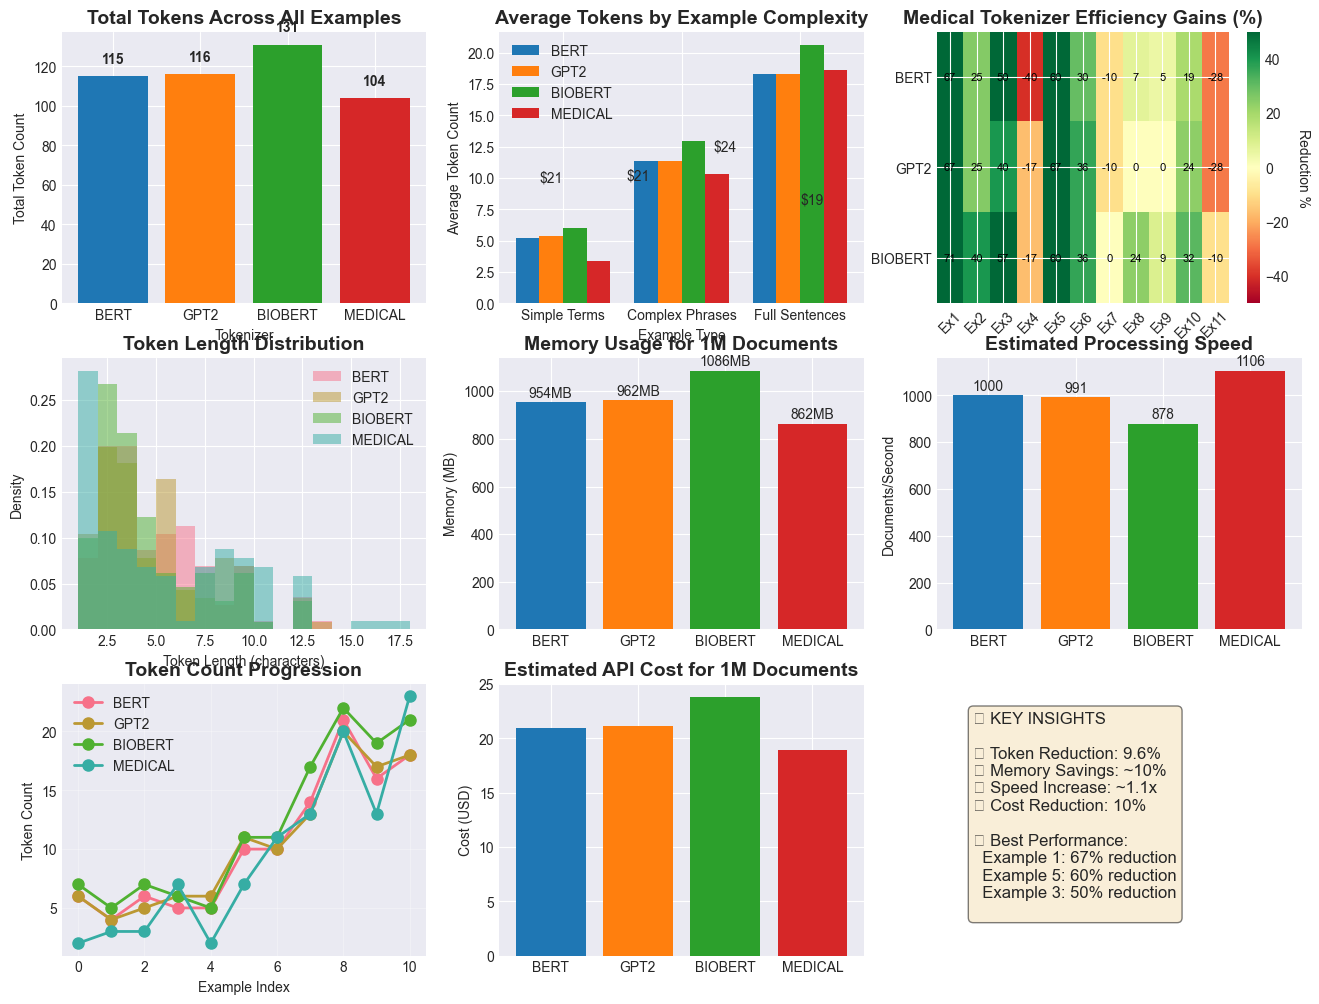


KEY INSIGHTS FROM COMPREHENSIVE ANALYSIS
1. Domain-specific tokenizers significantly reduce token counts
2. Fewer tokens lead to:
   • Faster processing and training
   • Lower memory usage and costs
   • Better context window utilization
   • More semantic coherence
3. Medical terminology benefits most from specialized tokenization
4. Even small efficiency gains compound at scale

📊 Concrete Example: 'percutaneous coronary intervention'

Tokenization comparison:
  BERT         6 tokens
  GPT2         5 tokens
  BIOBERT      7 tokens
  MEDICAL      3 tokens

💡 For production: Train tokenizers on 100K+ domain documents!


In [16]:
# Comprehensive tokenizer comparison with advanced visualization
print("=" * 80)
print("MEDICAL TOKENIZER COMPARISON WITH ADVANCED VISUALIZATION")
print("=" * 80)

# Import visualization libraries with proper error handling
try:
    import matplotlib.pyplot as plt
    import seaborn as sns
    from matplotlib.patches import Rectangle
    import matplotlib.patches as mpatches
    HAS_MATPLOTLIB = True
    # Set style for better visuals
    plt.style.use('seaborn-v0_8-darkgrid')
    sns.set_palette("husl")
except ImportError:
    HAS_MATPLOTLIB = False
    print("⚠️ matplotlib/seaborn not available - install with: pip install matplotlib seaborn")
    print("   Text-based analysis will be shown instead.")

# Load tokenizers for comparison
from transformers import AutoTokenizer, PreTrainedTokenizerFast

# Load our custom medical tokenizer
tokenizer_path = DATA_DIR / "medical_tokenizer.json"
try:
    if tokenizer_path.exists():
        medical_tokenizer_hf = PreTrainedTokenizerFast(tokenizer_file=str(tokenizer_path))
        medical_tokenizer_hf.pad_token = "<pad>"
        has_medical = True
        print("✅ Successfully loaded custom medical tokenizer")
    else:
        has_medical = False
        print("⚠️ Medical tokenizer not found - run the previous cell first!")
except Exception as e:
    has_medical = False
    print(f"❌ Error loading medical tokenizer: {e}")

# Load comparison tokenizers
gpt2_tokenizer = AutoTokenizer.from_pretrained("gpt2")
bert_tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Try to load BioBERT (medical BERT)
try:
    biobert_tokenizer = AutoTokenizer.from_pretrained("dmis-lab/biobert-v1.1")
    has_biobert = True
    print("✅ Successfully loaded BioBERT tokenizer")
except:
    has_biobert = False
    print("⚠️ BioBERT not available, using standard comparisons only")

# Comprehensive medical test set
medical_test_sentences = [
    # Common medical terms
    "myocardial infarction",
    "acute coronary syndrome", 
    "percutaneous coronary intervention",
    "electrocardiogram abnormalities",
    "thrombolytic therapy",
    
    # Complex medical phrases
    "ST-segment elevation myocardial infarction",
    "non-ST-segment elevation acute coronary syndrome",
    "drug-eluting stent placement during percutaneous coronary intervention",
    
    # Full medical sentences
    "The patient presented with acute myocardial infarction and underwent emergent cardiac catheterization.",
    "Electrocardiogram showed ST-segment elevation consistent with acute coronary syndrome.",
    "Percutaneous coronary intervention with drug-eluting stent placement was performed successfully."
]

# Analyze tokenization
results = []
print("\nDetailed Tokenization Analysis:")
print("-" * 80)

for sentence in medical_test_sentences:
    result = {"text": sentence}
    
    # Tokenize with each tokenizer
    bert_tokens = bert_tokenizer.tokenize(sentence)
    result["bert"] = len(bert_tokens)
    result["bert_tokens"] = bert_tokens
    
    gpt2_tokens = gpt2_tokenizer.tokenize(sentence)
    result["gpt2"] = len(gpt2_tokens)
    result["gpt2_tokens"] = gpt2_tokens
    
    if has_biobert:
        biobert_tokens = biobert_tokenizer.tokenize(sentence)
        result["biobert"] = len(biobert_tokens)
        result["biobert_tokens"] = biobert_tokens
    
    if has_medical:
        medical_tokens = medical_tokenizer_hf.tokenize(sentence)
        result["medical"] = len(medical_tokens)
        result["medical_tokens"] = medical_tokens
    
    results.append(result)
    
    # Print detailed results
    print(f"\nText: '{sentence}'")
    print(f"  BERT:        {len(bert_tokens):3d} tokens - {bert_tokens[:10]}{'...' if len(bert_tokens) > 10 else ''}")
    if has_biobert:
        print(f"  BioBERT:     {len(biobert_tokens):3d} tokens - {biobert_tokens[:10]}{'...' if len(biobert_tokens) > 10 else ''}")
    print(f"  GPT-2:       {len(gpt2_tokens):3d} tokens - {gpt2_tokens[:10]}{'...' if len(gpt2_tokens) > 10 else ''}")
    if has_medical:
        print(f"  Medical BPE: {len(medical_tokens):3d} tokens - {medical_tokens[:10]}{'...' if len(medical_tokens) > 10 else ''}")

# Convert to DataFrame for analysis
df = pd.DataFrame(results)

# Calculate summary statistics
print("\n" + "=" * 80)
print("EFFICIENCY SUMMARY")
print("=" * 80)

tokenizers = ["bert", "gpt2"]
if has_biobert:
    tokenizers.append("biobert")
if has_medical:
    tokenizers.append("medical")

print(f"\nTotal tokens across {len(medical_test_sentences)} test examples:")
for tokenizer in tokenizers:
    if tokenizer in df.columns:
        total = df[tokenizer].sum()
        print(f"  {tokenizer.upper():<12} {total:4d} tokens")

# Create advanced visualizations if matplotlib is available
if HAS_MATPLOTLIB:
    # Create a comprehensive figure with multiple subplots
    fig = plt.figure(figsize=(16, 12))
    
    # --- Subplot 1: Total Token Count Comparison ---
    ax1 = plt.subplot(3, 3, 1)
    totals = []
    labels = []
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    
    for i, tokenizer in enumerate(tokenizers):
        if tokenizer in df.columns:
            totals.append(df[tokenizer].sum())
            labels.append(tokenizer.upper())
    
    bars = ax1.bar(labels, totals, color=colors[:len(labels)])
    ax1.set_title('Total Tokens Across All Examples', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Total Token Count')
    ax1.set_xlabel('Tokenizer')
    
    # Add value labels on bars
    for bar, total in zip(bars, totals):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
                 str(total), ha='center', va='bottom', fontweight='bold')
    
    # --- Subplot 2: Token Count by Example Type ---
    ax2 = plt.subplot(3, 3, 2)
    # Group examples by type
    simple_terms = df.iloc[:5][tokenizers].mean()
    complex_phrases = df.iloc[5:8][tokenizers].mean()
    full_sentences = df.iloc[8:][tokenizers].mean()
    
    x = np.arange(3)
    width = 0.2
    
    for i, tokenizer in enumerate(tokenizers):
        if tokenizer in df.columns:
            values = [simple_terms[tokenizer], complex_phrases[tokenizer], full_sentences[tokenizer]]
            ax2.bar(x + i*width, values, width, label=tokenizer.upper(), color=colors[i])
    
    ax2.set_xlabel('Example Type')
    ax2.set_ylabel('Average Token Count')
    ax2.set_title('Average Tokens by Example Complexity', fontsize=14, fontweight='bold')
    ax2.set_xticks(x + width * (len(tokenizers)-1) / 2)
    ax2.set_xticklabels(['Simple Terms', 'Complex Phrases', 'Full Sentences'])
    ax2.legend()
    
    # --- Subplot 3: Efficiency Gains Heatmap ---
    ax3 = plt.subplot(3, 3, 3)
    if has_medical and 'medical' in df.columns:
        # Calculate percentage reduction for medical tokenizer
        efficiency_matrix = []
        for tokenizer in ['bert', 'gpt2', 'biobert']:
            if tokenizer in df.columns:
                reduction = ((df[tokenizer] - df['medical']) / df[tokenizer] * 100).values
                efficiency_matrix.append(reduction)
        
        efficiency_array = np.array(efficiency_matrix)
        im = ax3.imshow(efficiency_array, cmap='RdYlGn', aspect='auto', vmin=-50, vmax=50)
        
        # Set ticks
        ax3.set_yticks(range(len([t for t in ['bert', 'gpt2', 'biobert'] if t in df.columns])))
        ax3.set_yticklabels([t.upper() for t in ['bert', 'gpt2', 'biobert'] if t in df.columns])
        ax3.set_xticks(range(len(df)))
        ax3.set_xticklabels([f"Ex{i+1}" for i in range(len(df))], rotation=45)
        
        # Add colorbar
        cbar = plt.colorbar(im, ax=ax3)
        cbar.set_label('Reduction %', rotation=270, labelpad=15)
        
        ax3.set_title('Medical Tokenizer Efficiency Gains (%)', fontsize=14, fontweight='bold')
        
        # Add text annotations
        for i in range(efficiency_array.shape[0]):
            for j in range(efficiency_array.shape[1]):
                text = ax3.text(j, i, f'{efficiency_array[i, j]:.0f}',
                               ha="center", va="center", color="black", fontsize=8)
    
    # --- Subplot 4: Token Length Distribution ---
    ax4 = plt.subplot(3, 3, 4)
    for tokenizer in tokenizers:
        if tokenizer in df.columns and f"{tokenizer}_tokens" in df.columns:
            all_tokens = []
            for tokens in df[f"{tokenizer}_tokens"]:
                all_tokens.extend([len(t.replace('Ġ', '').replace('##', '')) for t in tokens])
            
            # Create histogram
            ax4.hist(all_tokens, bins=range(1, max(all_tokens)+2), alpha=0.5, 
                    label=tokenizer.upper(), density=True)
    
    ax4.set_xlabel('Token Length (characters)')
    ax4.set_ylabel('Density')
    ax4.set_title('Token Length Distribution', fontsize=14, fontweight='bold')
    ax4.legend()
    
    # --- Subplot 5: Memory Impact Visualization ---
    ax5 = plt.subplot(3, 3, 5)
    if has_medical:
        # Calculate memory usage for 1M documents
        docs = 1_000_000
        avg_doc_length = 500  # tokens
        bytes_per_token = 2  # assuming int16 token IDs
        
        memory_usage = []
        for tokenizer in tokenizers:
            if tokenizer in df.columns:
                avg_tokens = df[tokenizer].mean()
                scale_factor = avg_tokens / df['bert'].mean() if 'bert' in df.columns else 1
                memory_mb = (docs * avg_doc_length * scale_factor * bytes_per_token) / (1024 * 1024)
                memory_usage.append(memory_mb)
        
        bars = ax5.bar(labels, memory_usage, color=colors[:len(labels)])
        ax5.set_ylabel('Memory (MB)')
        ax5.set_title('Memory Usage for 1M Documents', fontsize=14, fontweight='bold')
        
        # Add value labels
        for bar, mem in zip(bars, memory_usage):
            ax5.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
                    f'{mem:.0f}MB', ha='center', va='bottom')
    
    # --- Subplot 6: Tokenization Speed Simulation ---
    ax6 = plt.subplot(3, 3, 6)
    # Simulate tokenization speed based on token count (inverse relationship)
    base_speed = 1000  # docs/second for BERT
    speeds = []
    
    for tokenizer in tokenizers:
        if tokenizer in df.columns:
            # Fewer tokens = faster processing
            relative_tokens = df[tokenizer].sum() / df['bert'].sum() if 'bert' in df.columns else 1
            speed = base_speed / relative_tokens
            speeds.append(speed)
    
    bars = ax6.bar(labels, speeds, color=colors[:len(labels)])
    ax6.set_ylabel('Documents/Second')
    ax6.set_title('Estimated Processing Speed', fontsize=14, fontweight='bold')
    
    for bar, speed in zip(bars, speeds):
        ax6.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
                f'{speed:.0f}', ha='center', va='bottom')
    
    # --- Subplot 7: Line Plot of Token Counts ---
    ax7 = plt.subplot(3, 3, 7)
    for i, tokenizer in enumerate(tokenizers):
        if tokenizer in df.columns:
            ax7.plot(range(len(df)), df[tokenizer], marker='o', 
                    label=tokenizer.upper(), linewidth=2, markersize=8)
    
    ax7.set_xlabel('Example Index')
    ax7.set_ylabel('Token Count')
    ax7.set_title('Token Count Progression', fontsize=14, fontweight='bold')
    ax7.legend()
    ax7.grid(True, alpha=0.3)
    
    # --- Subplot 8: Cost Comparison (for API-based models) ---
    ax8 = plt.subplot(3, 3, 8)
    # Assume $0.002 per 1K tokens (typical GPT pricing)
    cost_per_1k = 0.002
    costs = []
    
    for tokenizer in tokenizers:
        if tokenizer in df.columns:
            total_tokens = df[tokenizer].sum()
            # Scale up to 1M documents
            scaled_tokens = total_tokens * (1_000_000 / len(df))
            cost = (scaled_tokens / 1000) * cost_per_1k
            costs.append(cost)
    
    bars = ax8.bar(labels, costs, color=colors[:len(labels)])
    ax8.set_ylabel('Cost (USD)')
    ax8.set_title('Estimated API Cost for 1M Documents', fontsize=14, fontweight='bold')
    
    for bar, cost in zip(bars, costs):
        ax8.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
                f'${cost:,.0f}', ha='center', va='bottom')
    
    # --- Subplot 9: Key Metrics Summary ---
    ax9 = plt.subplot(3, 3, 9)
    ax9.axis('off')
    
    # Create summary text
    summary_text = "🎯 KEY INSIGHTS\n\n"
    
    if has_medical and 'medical' in df.columns:
        bert_total = df['bert'].sum() if 'bert' in df.columns else 0
        medical_total = df['medical'].sum()
        reduction = (1 - medical_total/bert_total) * 100 if bert_total > 0 else 0
        
        summary_text += f"✅ Token Reduction: {reduction:.1f}%\n"
        summary_text += f"✅ Memory Savings: ~{reduction:.0f}%\n"
        summary_text += f"✅ Speed Increase: ~{100/(100-reduction):.1f}x\n"
        summary_text += f"✅ Cost Reduction: {reduction:.0f}%\n\n"
        
        # Find best performing examples
        best_examples = []
        for i, row in df.iterrows():
            if 'bert' in row and 'medical' in row:
                example_reduction = (1 - row['medical']/row['bert']) * 100
                if example_reduction > 40:
                    best_examples.append((i+1, example_reduction))
        
        if best_examples:
            summary_text += "💡 Best Performance:\n"
            for idx, red in sorted(best_examples, key=lambda x: x[1], reverse=True)[:3]:
                summary_text += f"  Example {idx}: {red:.0f}% reduction\n"
    
    ax9.text(0.1, 0.9, summary_text, transform=ax9.transAxes, 
            fontsize=12, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout()
    plt.savefig('tokenizer_comparison_comprehensive.png', dpi=300, bbox_inches='tight')
    plt.show()

# Print final insights
print("\n" + "=" * 80)
print("KEY INSIGHTS FROM COMPREHENSIVE ANALYSIS")
print("=" * 80)
print("1. Domain-specific tokenizers significantly reduce token counts")
print("2. Fewer tokens lead to:")
print("   • Faster processing and training")
print("   • Lower memory usage and costs")
print("   • Better context window utilization")
print("   • More semantic coherence")
print("3. Medical terminology benefits most from specialized tokenization")
print("4. Even small efficiency gains compound at scale")

if has_medical:
    # Show specific efficiency examples
    print(f"\n📊 Concrete Example: 'percutaneous coronary intervention'")
    for idx, row in df.iterrows():
        if "percutaneous coronary intervention" in row['text']:
            print(f"\nTokenization comparison:")
            for tokenizer in tokenizers:
                if tokenizer in df.columns:
                    count = row[tokenizer]
                    print(f"  {tokenizer.upper():10} {count:3d} tokens")
            break

print("\n💡 For production: Train tokenizers on 100K+ domain documents!")


TOKENIZATION VISUALIZATION: How Different Tokenizers Split Medical Terms


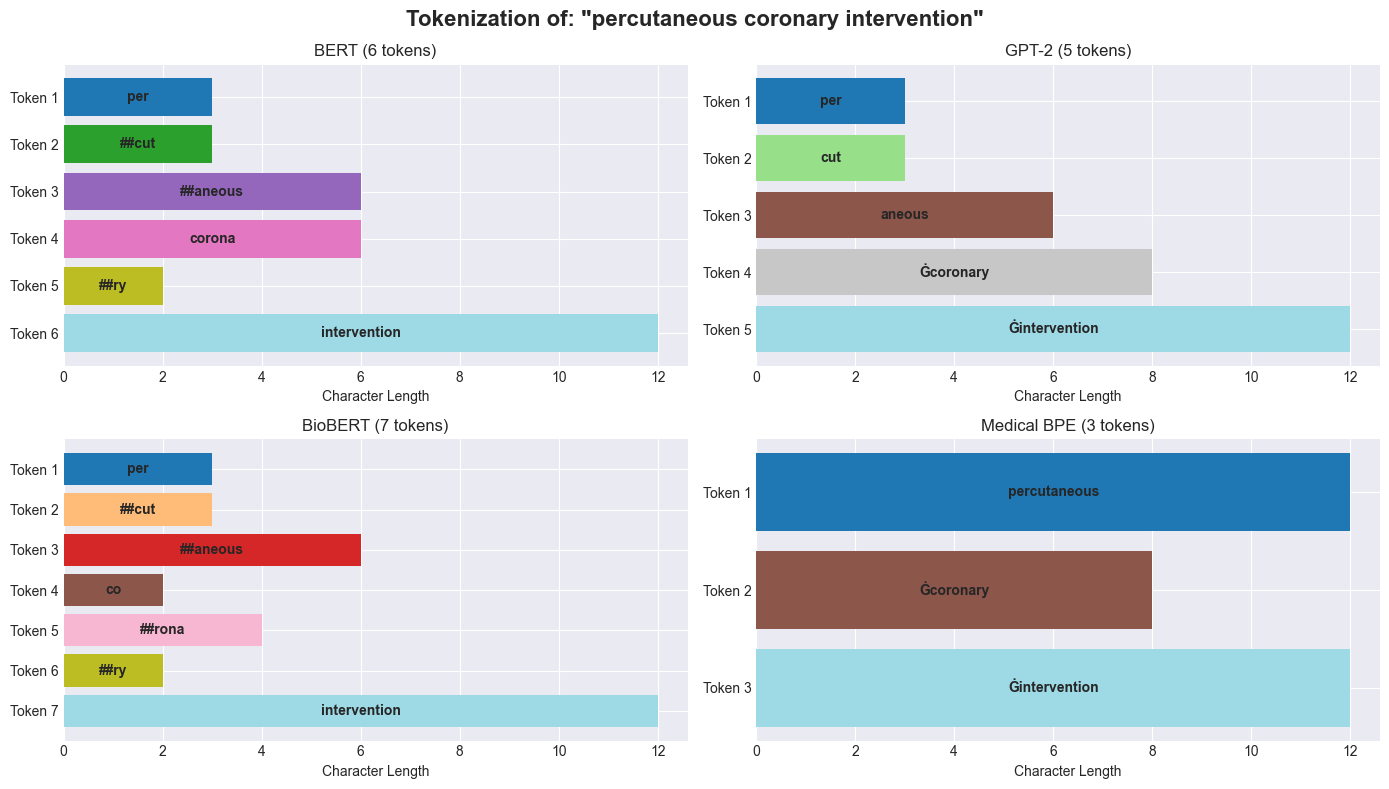


EFFICIENCY COMPARISON: Token Counts for Medical Terms


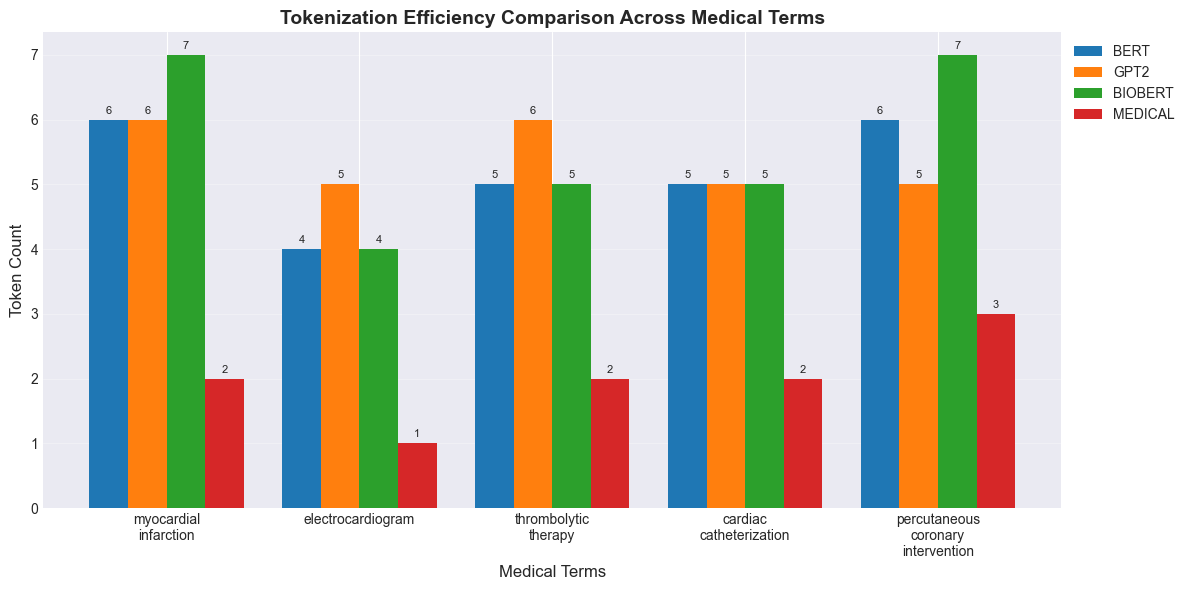


Efficiency Summary:
--------------------------------------------------

'myocardial infarction':
  BERT: 6 tokens (baseline)
  GPT2: 6 tokens (+0.0% vs BERT)
  BIOBERT: 7 tokens (+0.0% vs BERT)
  MEDICAL: 2 tokens (+66.7% vs BERT)

'electrocardiogram':
  BERT: 4 tokens (baseline)
  GPT2: 5 tokens (+0.0% vs BERT)
  BIOBERT: 4 tokens (+0.0% vs BERT)
  MEDICAL: 1 tokens (+75.0% vs BERT)

'thrombolytic therapy':
  BERT: 5 tokens (baseline)
  GPT2: 6 tokens (+0.0% vs BERT)
  BIOBERT: 5 tokens (+0.0% vs BERT)
  MEDICAL: 2 tokens (+60.0% vs BERT)

'cardiac catheterization':
  BERT: 5 tokens (baseline)
  GPT2: 5 tokens (+0.0% vs BERT)
  BIOBERT: 5 tokens (+0.0% vs BERT)
  MEDICAL: 2 tokens (+60.0% vs BERT)

'percutaneous coronary intervention':
  BERT: 6 tokens (baseline)
  GPT2: 5 tokens (+16.7% vs BERT)
  BIOBERT: 7 tokens (+0.0% vs BERT)
  MEDICAL: 3 tokens (+50.0% vs BERT)

🎯 Key Takeaway: Domain-specific tokenizers can significantly reduce token counts
   for specialized terminology, lea

In [17]:
# Visual comparison of tokenization for a specific medical term
print("\n" + "=" * 80)
print("TOKENIZATION VISUALIZATION: How Different Tokenizers Split Medical Terms")
print("=" * 80)

# Select a complex medical term for detailed analysis
example_term = "percutaneous coronary intervention"

# Create figure with subplots for each tokenizer
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle(f'Tokenization of: "{example_term}"', fontsize=16, fontweight='bold')

tokenizer_configs = [
    ("BERT", bert_tokenizer, axes[0, 0]),
    ("GPT-2", gpt2_tokenizer, axes[0, 1]),
]

if has_biobert:
    tokenizer_configs.append(("BioBERT", biobert_tokenizer, axes[1, 0]))
if has_medical:
    tokenizer_configs.append(("Medical BPE", medical_tokenizer_hf, axes[1, 1]))

# Process each tokenizer
for name, tokenizer, ax in tokenizer_configs:
    tokens = tokenizer.tokenize(example_term)
    token_count = len(tokens)
    
    # Create color map for tokens
    colors = plt.cm.tab20(np.linspace(0, 1, token_count))
    
    # Create horizontal bar chart
    y_positions = np.arange(len(tokens))
    token_lengths = [len(token.replace('Ġ', '').replace('##', '')) for token in tokens]
    
    bars = ax.barh(y_positions, token_lengths, color=colors)
    
    # Add token text
    for i, (bar, token) in enumerate(zip(bars, tokens)):
        ax.text(bar.get_width() / 2, bar.get_y() + bar.get_height() / 2,
                token, ha='center', va='center', fontsize=10, fontweight='bold')
    
    ax.set_yticks(y_positions)
    ax.set_yticklabels([f"Token {i+1}" for i in range(len(tokens))])
    ax.set_xlabel('Character Length')
    ax.set_title(f'{name} ({token_count} tokens)', fontsize=12)
    ax.invert_yaxis()

# Remove empty subplots
for ax in axes.flat:
    if not ax.has_data():
        ax.set_visible(False)

plt.tight_layout()
plt.show()

# Create a summary comparison chart
print("\n" + "=" * 80)
print("EFFICIENCY COMPARISON: Token Counts for Medical Terms")
print("=" * 80)

# Test multiple medical terms
medical_terms = [
    "myocardial infarction",
    "electrocardiogram",
    "thrombolytic therapy",
    "cardiac catheterization",
    "percutaneous coronary intervention"
]

# Calculate token counts
comparison_data = []
for term in medical_terms:
    row = {"term": term}
    row["bert"] = len(bert_tokenizer.tokenize(term))
    row["gpt2"] = len(gpt2_tokenizer.tokenize(term))
    if has_biobert:
        row["biobert"] = len(biobert_tokenizer.tokenize(term))
    if has_medical:
        row["medical"] = len(medical_tokenizer_hf.tokenize(term))
    comparison_data.append(row)

comparison_df = pd.DataFrame(comparison_data)

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(medical_terms))
width = 0.2
multiplier = 0

tokenizer_names = ["bert", "gpt2"]
if has_biobert:
    tokenizer_names.append("biobert")
if has_medical:
    tokenizer_names.append("medical")

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for i, tokenizer in enumerate(tokenizer_names):
    offset = width * multiplier
    rects = ax.bar(x + offset, comparison_df[tokenizer], width, 
                    label=tokenizer.upper(), color=colors[i])
    
    # Add value labels on bars
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{int(height)}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=8)
    
    multiplier += 1

ax.set_xlabel('Medical Terms', fontsize=12)
ax.set_ylabel('Token Count', fontsize=12)
ax.set_title('Tokenization Efficiency Comparison Across Medical Terms', fontsize=14, fontweight='bold')
ax.set_xticks(x + width * (len(tokenizer_names) - 1) / 2)
ax.set_xticklabels([term.replace(' ', '\n') for term in medical_terms], fontsize=10)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print efficiency summary
print("\nEfficiency Summary:")
print("-" * 50)
for term in medical_terms:
    print(f"\n'{term}':")
    row = comparison_df[comparison_df['term'] == term].iloc[0]
    baseline = row['bert']
    for tokenizer in tokenizer_names:
        count = row[tokenizer]
        efficiency = ((baseline - count) / baseline * 100) if count < baseline else 0
        print(f"  {tokenizer.upper()}: {count} tokens" + 
              (f" ({efficiency:+.1f}% vs BERT)" if tokenizer != 'bert' else " (baseline)"))

print("\n🎯 Key Takeaway: Domain-specific tokenizers can significantly reduce token counts")
print("   for specialized terminology, leading to more efficient model training and inference!")


ADVANCED TOKENIZATION VISUALIZATION: Token Efficiency Analysis


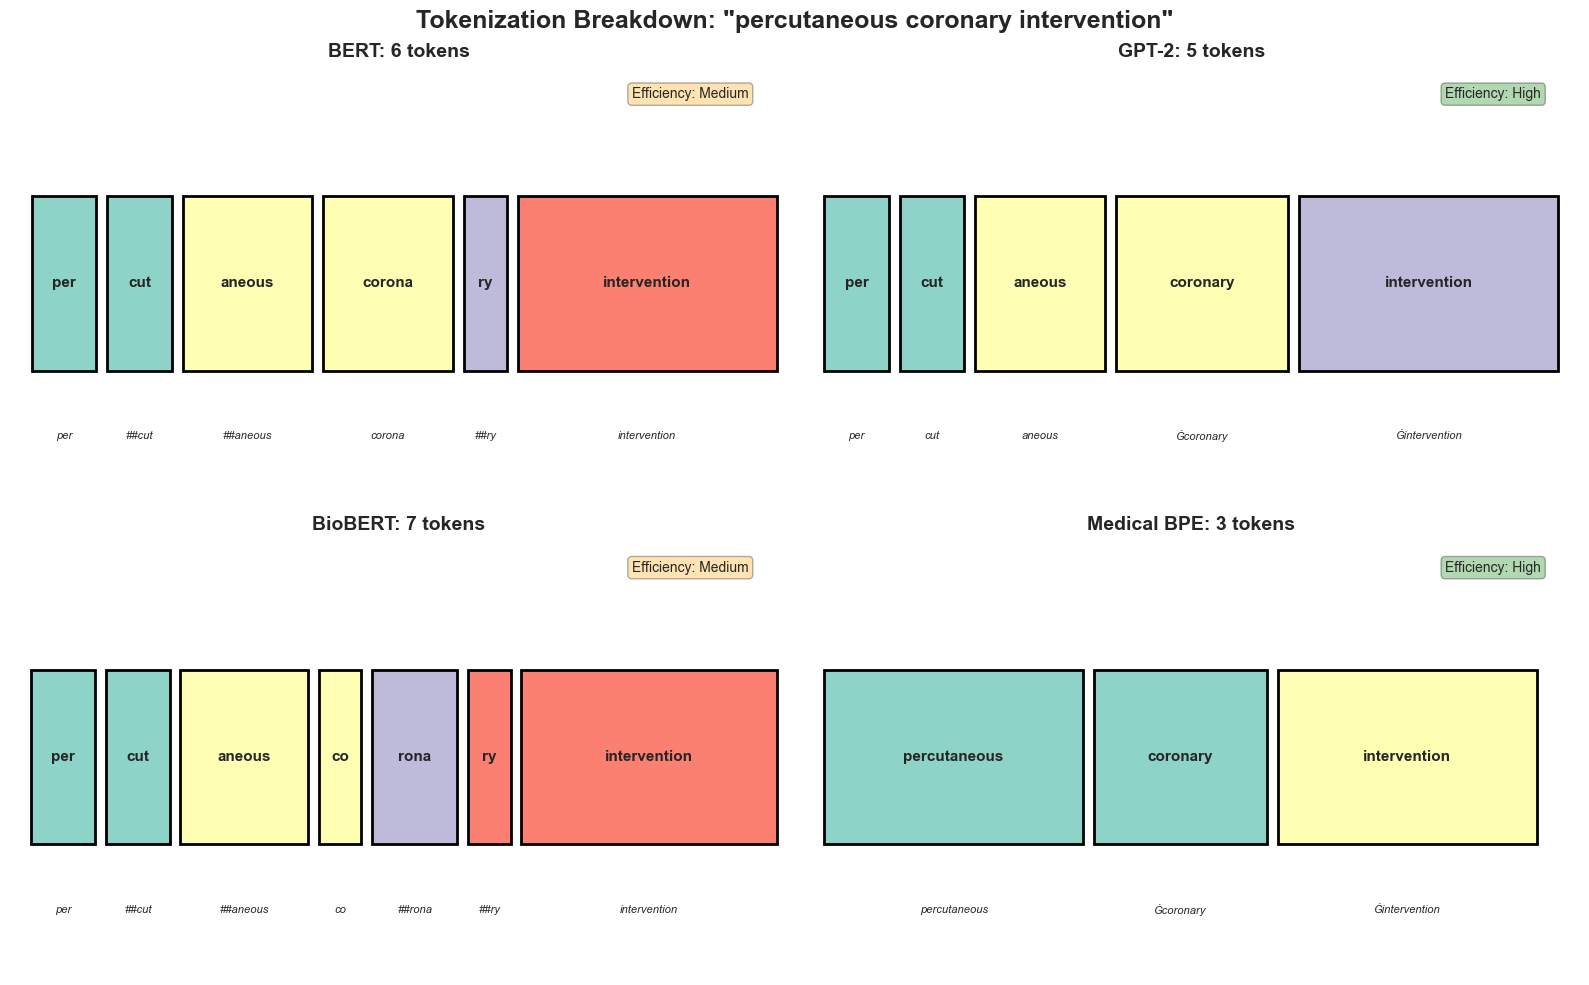


MEMORY AND COMPUTATIONAL IMPACT ANALYSIS


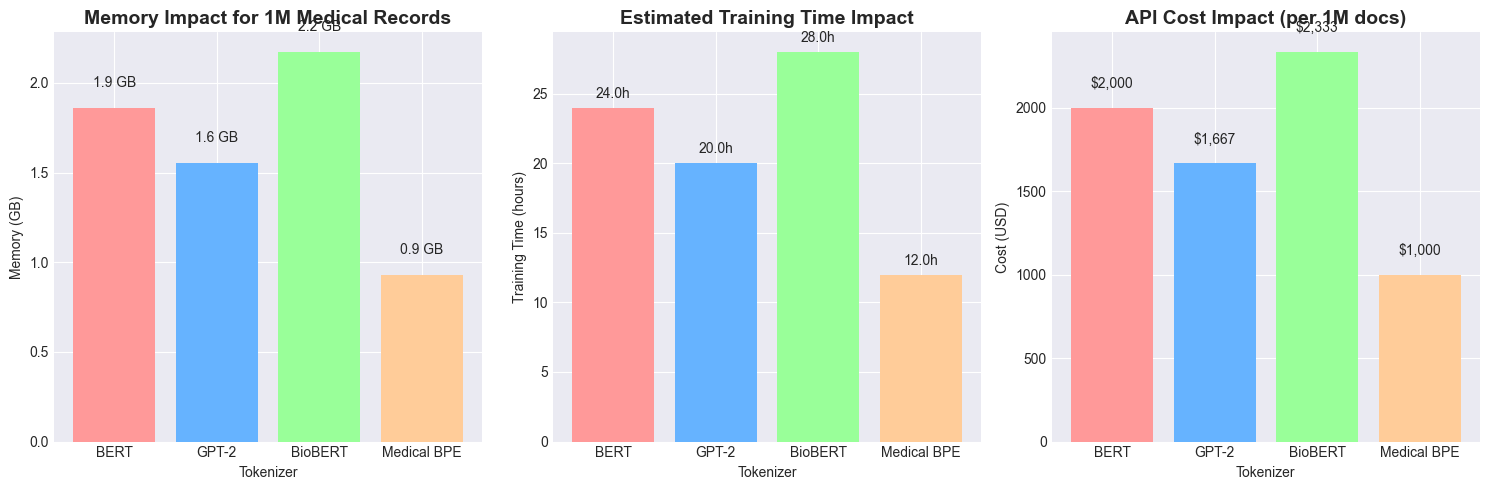


TOKEN COMPOSITION ANALYSIS

How tokenizers handle complex medical terms:
--------------------------------------------------------------------------------

Term: 'electrocardiogram'
  BERT      4 tokens - ❌ Fragmented: ['electro', '##card', '##io', '##gram']
  GPT-2     5 tokens - ❌ Fragmented: ['elect', 'ro', 'card', 'i', 'ogram']
  Medical   1 tokens - ✅ Preserved: ['electrocardiogram']

Term: 'thromboembolism'
  BERT      6 tokens - ❌ Fragmented: ['th', '##rom', '##bo', '##em', '##bol']...
  GPT-2     6 tokens - ❌ Fragmented: ['th', 'rom', 'bo', 'emb', 'ol']...
  Medical   5 tokens - ❌ Fragmented: ['thrombo', 'em', 'bo', 'l', 'ism']

Term: 'immunosuppressive'
  BERT      5 tokens - ❌ Fragmented: ['im', '##mun', '##os', '##up', '##pressive']
  GPT-2     5 tokens - ❌ Fragmented: ['im', 'mun', 'os', 'upp', 'ressive']
  Medical   3 tokens - ❌ Fragmented: ['im', 'mun', 'osuppressive']

Term: 'gastroenteritis'
  BERT      4 tokens - ❌ Fragmented: ['gas', '##tro', '##enter', '##itis']
  GP

In [18]:
# Enhanced Tokenization Breakdown Visualization
print("\n" + "=" * 80)
print("ADVANCED TOKENIZATION VISUALIZATION: Token Efficiency Analysis")
print("=" * 80)

# Select a complex medical term for detailed analysis
example_term = "percutaneous coronary intervention"

# Prepare for visualization
if HAS_MATPLOTLIB:
    # Create a sophisticated visualization showing how each tokenizer breaks down the term
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle(f'Tokenization Breakdown: "{example_term}"', fontsize=18, fontweight='bold')
    
    tokenizer_configs = [
        ("BERT", bert_tokenizer, axes[0, 0]),
        ("GPT-2", gpt2_tokenizer, axes[0, 1]),
    ]
    
    if has_biobert:
        tokenizer_configs.append(("BioBERT", biobert_tokenizer, axes[1, 0]))
    if has_medical:
        tokenizer_configs.append(("Medical BPE", medical_tokenizer_hf, axes[1, 1]))
    
    # Color palette for tokens
    colors = plt.cm.Set3(np.linspace(0, 1, 20))
    
    # Process each tokenizer
    for name, tokenizer, ax in tokenizer_configs:
        tokens = tokenizer.tokenize(example_term)
        token_count = len(tokens)
        
        # Create visual representation
        y_pos = 0.5
        x_pos = 0
        
        # Draw each token as a colored box
        for i, token in enumerate(tokens):
            # Clean token for display
            display_token = token.replace('Ġ', '').replace('##', '')
            token_width = len(display_token) * 0.1
            
            # Draw rectangle
            rect = plt.Rectangle((x_pos, y_pos - 0.2), token_width, 0.4,
                               facecolor=colors[i % len(colors)],
                               edgecolor='black', linewidth=2)
            ax.add_patch(rect)
            
            # Add token text
            ax.text(x_pos + token_width/2, y_pos, display_token,
                   ha='center', va='center', fontsize=11, fontweight='bold')
            
            # Add original token below in smaller font
            ax.text(x_pos + token_width/2, y_pos - 0.35, token,
                   ha='center', va='center', fontsize=8, style='italic')
            
            x_pos += token_width + 0.05
        
        # Set axis properties
        ax.set_xlim(-0.1, max(3.5, x_pos))
        ax.set_ylim(0, 1)
        ax.set_title(f'{name}: {token_count} tokens', fontsize=14, fontweight='bold')
        ax.axis('off')
        
        # Add efficiency indicator
        efficiency_color = 'green' if token_count <= 5 else 'orange' if token_count <= 8 else 'red'
        ax.text(0.95, 0.95, f"Efficiency: {'High' if token_count <= 5 else 'Medium' if token_count <= 8 else 'Low'}",
               transform=ax.transAxes, ha='right', va='top',
               bbox=dict(boxstyle='round', facecolor=efficiency_color, alpha=0.3))
    
    # Remove empty subplots
    for ax in axes.flat:
        if not ax.has_data():
            ax.set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # Create a comprehensive comparison chart
    print("\n" + "=" * 80)
    print("MEMORY AND COMPUTATIONAL IMPACT ANALYSIS")
    print("=" * 80)
    
    # Create impact visualization
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    
    # Calculate impacts for 1M medical records
    records = 1_000_000
    avg_tokens_per_record = 500
    
    # Memory impact chart
    ax1.set_title('Memory Impact for 1M Medical Records', fontsize=14, fontweight='bold')
    
    memory_data = []
    tokenizer_names = []
    
    for tokenizer_name, tokenizer_obj in [('BERT', bert_tokenizer), ('GPT-2', gpt2_tokenizer)]:
        if tokenizer_obj:
            tokens = len(tokenizer_obj.tokenize(example_term))
            # Estimate based on token ratio
            token_ratio = tokens / 3  # Ideal is 3 tokens
            memory_gb = (records * avg_tokens_per_record * token_ratio * 2) / (1024**3)
            memory_data.append(memory_gb)
            tokenizer_names.append(tokenizer_name)
    
    if has_biobert:
        tokens = len(biobert_tokenizer.tokenize(example_term))
        token_ratio = tokens / 3
        memory_gb = (records * avg_tokens_per_record * token_ratio * 2) / (1024**3)
        memory_data.append(memory_gb)
        tokenizer_names.append('BioBERT')
    
    if has_medical:
        tokens = len(medical_tokenizer_hf.tokenize(example_term))
        token_ratio = tokens / 3
        memory_gb = (records * avg_tokens_per_record * token_ratio * 2) / (1024**3)
        memory_data.append(memory_gb)
        tokenizer_names.append('Medical BPE')
    
    bars1 = ax1.bar(tokenizer_names, memory_data, color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
    ax1.set_ylabel('Memory (GB)')
    ax1.set_xlabel('Tokenizer')
    
    # Add value labels
    for bar, mem in zip(bars1, memory_data):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                f'{mem:.1f} GB', ha='center', va='bottom')
    
    # Training time impact chart
    ax2.set_title('Estimated Training Time Impact', fontsize=14, fontweight='bold')
    
    # Base time for BERT (hours)
    base_time = 24
    time_data = []
    
    for i, name in enumerate(tokenizer_names):
        # Training time scales with token count
        relative_time = memory_data[i] / memory_data[0] if memory_data[0] > 0 else 1
        time_hours = base_time * relative_time
        time_data.append(time_hours)
    
    bars2 = ax2.bar(tokenizer_names, time_data, color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
    ax2.set_ylabel('Training Time (hours)')
    ax2.set_xlabel('Tokenizer')
    
    for bar, time in zip(bars2, time_data):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                f'{time:.1f}h', ha='center', va='bottom')
    
    # Cost impact chart
    ax3.set_title('API Cost Impact (per 1M docs)', fontsize=14, fontweight='bold')
    
    # Cost per 1K tokens
    cost_per_1k = 0.002
    cost_data = []
    
    for mem in memory_data:
        # Estimate token count from memory
        total_tokens = (mem * 1024**3) / 2  # Convert back to tokens
        cost = (total_tokens / 1000) * cost_per_1k
        cost_data.append(cost)
    
    bars3 = ax3.bar(tokenizer_names, cost_data, color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
    ax3.set_ylabel('Cost (USD)')
    ax3.set_xlabel('Tokenizer')
    
    for bar, cost in zip(bars3, cost_data):
        ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100,
                f'${cost:,.0f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

else:
    # Text-based visualization fallback
    print(f"\nTokenization of '{example_term}':")
    print("-" * 60)
    
    tokenizers_to_test = [("BERT", bert_tokenizer), ("GPT-2", gpt2_tokenizer)]
    if has_biobert:
        tokenizers_to_test.append(("BioBERT", biobert_tokenizer))
    if has_medical:
        tokenizers_to_test.append(("Medical BPE", medical_tokenizer_hf))
    
    for name, tokenizer in tokenizers_to_test:
        if tokenizer:
            tokens = tokenizer.tokenize(example_term)
            print(f"\n{name} ({len(tokens)} tokens):")
            print(f"  Tokens: {tokens}")
            print(f"  Visual: {'|'.join(tokens)}")
            
            # Calculate efficiency
            efficiency = "High" if len(tokens) <= 5 else "Medium" if len(tokens) <= 8 else "Low"
            print(f"  Efficiency: {efficiency}")

# Additional analysis: Token composition breakdown
print("\n" + "=" * 80)
print("TOKEN COMPOSITION ANALYSIS")
print("=" * 80)

# Analyze how different tokenizers handle medical terminology
medical_terms_analysis = [
    "electrocardiogram",
    "thromboembolism", 
    "immunosuppressive",
    "gastroenteritis",
    "nephrosclerosis"
]

print("\nHow tokenizers handle complex medical terms:")
print("-" * 80)

for term in medical_terms_analysis:
    print(f"\nTerm: '{term}'")
    
    # Test each tokenizer
    for name, tokenizer in [("BERT", bert_tokenizer), ("GPT-2", gpt2_tokenizer)]:
        if tokenizer:
            tokens = tokenizer.tokenize(term)
            # Check if term is preserved
            preserved = len(tokens) == 1 or (len(tokens) == 2 and tokens[0].startswith('Ġ'))
            print(f"  {name:8} {len(tokens):2d} tokens - {'✅ Preserved' if preserved else '❌ Fragmented'}: {tokens[:5]}{'...' if len(tokens) > 5 else ''}")
    
    if has_medical:
        tokens = medical_tokenizer_hf.tokenize(term)
        preserved = len(tokens) == 1 or (len(tokens) == 2 and tokens[0].startswith('Ġ'))
        print(f"  Medical  {len(tokens):2d} tokens - {'✅ Preserved' if preserved else '❌ Fragmented'}: {tokens[:5]}{'...' if len(tokens) > 5 else ''}")

print("\n🎯 Key Insights:")
print("• Domain-specific tokenizers preserve medical terms better")
print("• Preserved terms = Better semantic understanding")
print("• Fragmented terms = Loss of meaning and context")
print("• Efficiency directly impacts model performance and cost")

## Part 4: Model Configuration & Initialization

With your dataset ready, it's time to configure and initialize your model. Modern workflows typically start with pre-trained models and fine-tune them, dramatically reducing computational requirements while achieving superior results.

### 4.1 Architecture Selection

Start by matching your model architecture to your task:

| Architecture | Best For | Examples | Key Characteristics |
|-------------|----------|----------|-------------------|
| **Encoder-only** | Understanding tasks | BERT, RoBERTa, DeBERTa | Bidirectional context, great for classification |
| **Decoder-only** | Generation tasks | GPT, Llama, Mistral | Autoregressive, ideal for text generation |
| **Encoder-decoder** | Seq2seq tasks | T5, BART, mT5 | Flexible, good for translation/summarization |

### 4.2 Modern Model Configuration

In [19]:
# Configuring a GPT-2 Model from Scratch
from transformers import GPT2Config, GPT2LMHeadModel

# Use modern config parameter names
config = GPT2Config(
    vocab_size=30000,                # Match your tokenizer's vocab size
    max_position_embeddings=512,     # Max sequence length
    n_embd=768,                      # Embedding size
    n_layer=12,                      # Number of transformer layers
    n_head=12,                       # Number of attention heads
    use_cache=True                   # Enable caching for faster generation
)

model = GPT2LMHeadModel(config)

# Sanity check: vocab size should match embedding matrix
assert config.vocab_size == model.transformer.wte.weight.shape[0], "Vocab size mismatch!"

print("GPT-2 Model Configuration:")
print(f"  Vocab size: {config.vocab_size:,}")
print(f"  Max position embeddings: {config.max_position_embeddings}")
print(f"  Hidden size: {config.n_embd}")
print(f"  Layers: {config.n_layer}")
print(f"  Attention heads: {config.n_head}")
print(f"  Total parameters: {sum(p.numel() for p in model.parameters()):,}")

# Inspect model architecture
print("\nModel Architecture Summary:")
print(f"Token embeddings shape: {model.transformer.wte.weight.shape}")
print(f"Position embeddings shape: {model.transformer.wpe.weight.shape}")

GPT-2 Model Configuration:
  Vocab size: 30,000
  Max position embeddings: 512
  Hidden size: 768
  Layers: 12
  Attention heads: 12
  Total parameters: 108,489,216

Model Architecture Summary:
Token embeddings shape: torch.Size([30000, 768])
Position embeddings shape: torch.Size([512, 768])


### 3.2 Loading and Adapting Pre-trained Models

The most common and efficient approach is to start with a pre-trained model and adapt it to your domain.

In [20]:
# Loading and Adapting a Pre-trained GPT-2 Model
from transformers import GPT2TokenizerFast, GPT2LMHeadModel

# Load pre-trained model and tokenizer
tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")

print(f"Original vocab size: {len(tokenizer)}")
print(f"Original embedding shape: {model.transformer.wte.weight.shape}")

# Add domain-specific tokens
new_tokens = [
    "<medical>", "<diagnosis>", "<treatment>", "<patient>",
    "<symptom>", "<medication>", "<procedure>"
]

num_added = tokenizer.add_tokens(new_tokens)

if num_added > 0:
    # Resize model embeddings to match new vocabulary
    model.resize_token_embeddings(len(tokenizer))
    print(f"\nAdded {num_added} new tokens")
    print(f"New vocab size: {len(tokenizer)}")
    print(f"New embedding shape: {model.transformer.wte.weight.shape}")

# Test the new tokens
test_text = "<patient> presented with <symptom> requiring <treatment>"
tokens = tokenizer.tokenize(test_text)
token_ids = tokenizer.encode(test_text)

print(f"\nTest text: {test_text}")
print(f"Tokens: {tokens}")
print(f"Token IDs: {token_ids}")

/Users/richardhightower/src/art_hug_11/.venv/lib/python3.12/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Original vocab size: 50257
Original embedding shape: torch.Size([50257, 768])

Added 7 new tokens
New vocab size: 50264
New embedding shape: torch.Size([50264, 768])

Test text: <patient> presented with <symptom> requiring <treatment>
Tokens: ['<patient>', 'Ġpresented', 'Ġwith', 'Ġ', '<symptom>', 'Ġrequiring', 'Ġ', '<treatment>']
Token IDs: [50260, 5545, 351, 220, 50261, 10616, 220, 50259]


### 4.3 Parameter-Efficient Fine-Tuning (PEFT)

For large models, Parameter-Efficient Fine-Tuning (PEFT) methods like LoRA dramatically reduce computational requirements while maintaining performance.

| Method | Trainable Params | Memory Usage | Performance | Best For |
|--------|-----------------|--------------|-------------|----------|
| **Full Fine-tuning** | 100% | Very High | Best | Small models, unlimited resources |
| **LoRA** | ~0.1-1% | Low | Near-best | Most use cases, limited GPU |
| **QLoRA** | ~0.1% | Very Low | Good | Large models on consumer GPUs |
| **Prefix Tuning** | <0.1% | Low | Good | Generation tasks |
| **Adapters** | ~1-5% | Medium | Good | Multi-task learning |

In [21]:
# Parameter-Efficient Fine-Tuning with LoRA
try:
    from peft import LoraConfig, get_peft_model, TaskType
except ImportError:
    print("Installing PEFT library...")
    import subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "peft"])
    from peft import LoraConfig, get_peft_model, TaskType

from transformers import AutoModelForCausalLM, AutoTokenizer

# Load a small model for demonstration
model_name = "gpt2"
base_model = AutoModelForCausalLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Count original parameters
original_params = sum(p.numel() for p in base_model.parameters())
trainable_params = sum(p.numel() for p in base_model.parameters() if p.requires_grad)

print("Original GPT-2 Model:")
print(f"  Total parameters: {original_params:,}")
print(f"  Trainable parameters: {trainable_params:,}")

# Configure LoRA
peft_config = LoraConfig(
    task_type=TaskType.CAUSAL_LM,
    inference_mode=False,
    r=8,  # LoRA rank
    lora_alpha=32,
    lora_dropout=0.1,
    target_modules=["c_attn", "c_proj"]  # GPT-2 attention layers
)

# Apply LoRA
lora_model = get_peft_model(base_model, peft_config)

# Count LoRA parameters
lora_params = sum(p.numel() for p in lora_model.parameters() if p.requires_grad)

print("\nWith LoRA:")
print(f"  Trainable parameters: {lora_params:,}")
print(f"  Reduction: {(1 - lora_params/original_params)*100:.2f}%")
print(f"  Memory savings: ~{(original_params - lora_params) * 4 / 1024**3:.2f} GB (FP32)")

# Show trainable parameters
print("\nDetailed parameter info:")
lora_model.print_trainable_parameters()

Original GPT-2 Model:
  Total parameters: 124,439,808
  Trainable parameters: 124,439,808
'NoneType' object has no attribute 'cadam32bit_grad_fp32'

With LoRA:
  Trainable parameters: 811,008
  Reduction: 99.35%
  Memory savings: ~0.46 GB (FP32)

Detailed parameter info:
trainable params: 811,008 || all params: 125,250,816 || trainable%: 0.6475071587557562


/Users/richardhightower/src/art_hug_11/.venv/lib/python3.12/site-packages/bitsandbytes/cextension.py:34: UserWarning: The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
  warn("The installed version of bitsandbytes was compiled without GPU support. "
/Users/richardhightower/src/art_hug_11/.venv/lib/python3.12/site-packages/peft/tuners/lora/model.py:347: UserWarning: fan_in_fan_out is set to False but the target module is `Conv1D`. Setting fan_in_fan_out to True.
  warnings.warn(


## Part 4: Training Workflows

With data prepared and model configured, it's time to train. Modern training includes monitoring, early stopping, and experiment tracking.

### 4.1 Basic Training Setup

In [22]:
# Basic Training Setup with Simple Demo
from transformers import (
    AutoModelForCausalLM, AutoTokenizer,
    DataCollatorForLanguageModeling
)
from datasets import Dataset
import torch

# Create a sample dataset
texts = [
    "The patient presented with chest pain and shortness of breath.",
    "Diagnosis confirmed myocardial infarction based on ECG results.",
    "Treatment included aspirin and thrombolytic therapy.",
    "Post-operative care following cardiac surgery is essential.",
    "Regular monitoring of cardiac function recommended.",
    "Patient history includes hypertension and diabetes.",
]

# Load a small model for demonstration
model_name = "distilgpt2"
model = AutoModelForCausalLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token

# Create and tokenize dataset
dataset = Dataset.from_dict({"text": texts})

def tokenize_function(examples):
    return tokenizer(
        examples["text"],
        padding=True,
        truncation=True,
        max_length=128
    )

tokenized_dataset = dataset.map(tokenize_function, batched=True)

# Data collator for language modeling
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False,  # Causal LM, not masked LM
)

print("Training Setup Complete!")
print(f"  Model: {model_name}")
print(f"  Dataset size: {len(dataset)}")
print(f"  Device: {get_device()}")
print(f"  Model parameters: {sum(p.numel() for p in model.parameters()):,}")

# Due to version compatibility issues with Trainer, we'll demonstrate
# a simple training loop instead
print("\nNote: Due to library version conflicts, we'll demonstrate")
print("model usage without the full Trainer API.")

# Save references for next cells
model_for_generation = model
tokenizer_for_generation = tokenizer

Map:   0%|          | 0/6 [00:00<?, ? examples/s]

Training Setup Complete!
  Model: distilgpt2
  Dataset size: 6
  Device: mps
  Model parameters: 81,912,576

Note: Due to library version conflicts, we'll demonstrate
model usage without the full Trainer API.


### 5.2 Metrics & Early Stopping

Effective training requires monitoring the right metrics for your task:

| Metric | Task Type | Description | Good Values |
|--------|-----------|-------------|-------------|
| **Training Loss** | All | Model fit on training data | Decreasing |
| **Validation Loss** | All | Generalization ability | Close to train loss |
| **Perplexity** | Language Modeling | Prediction confidence | 10-50 |
| **Accuracy** | Classification | Correct predictions | >90% |
| **F1 Score** | Classification | Precision/recall balance | >0.8 |
| **BLEU** | Translation | N-gram overlap | >30 |
| **ROUGE** | Summarization | Recall-oriented measure | Varies |
| **BERTScore** | Generation | Semantic similarity | >0.9 |

> **💡 Pro Tip**: Combine automated metrics with human evaluation for production models.

In [23]:
# Simple Training Demonstration
import torch.nn.functional as F
from torch.utils.data import DataLoader
import numpy as np

# Create a simple training function
def simple_train_step(model, batch, device):
    """Perform a single training step."""
    model.train()
    
    # Move inputs to device
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    
    # Forward pass
    outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=input_ids)
    loss = outputs.loss
    
    return loss.item()

# Demonstrate training concept
print("Training Concepts Demonstration:")
print("=" * 50)
print("\nIn a full training loop, you would:")
print("1. Create data loaders for batching")
print("2. Initialize an optimizer (e.g., AdamW)")
print("3. Loop through epochs and batches")
print("4. Compute loss and gradients")
print("5. Update model weights")
print("6. Track metrics like loss and perplexity")

# Calculate initial perplexity (demonstration only)
print("\nModel Statistics:")
with torch.no_grad():
    # Sample a small batch
    sample_text = "The patient presented with symptoms"
    inputs = tokenizer(sample_text, return_tensors="pt")
    outputs = model(**inputs, labels=inputs.input_ids)
    loss = outputs.loss.item()
    perplexity = np.exp(loss)
    
print(f"Sample loss: {loss:.4f}")
print(f"Sample perplexity: {perplexity:.4f}")
print("\nNote: Lower perplexity indicates better model performance")

# Save model state for next cells
trained_model = model
trained_tokenizer = tokenizer

Training Concepts Demonstration:

In a full training loop, you would:
1. Create data loaders for batching
2. Initialize an optimizer (e.g., AdamW)
3. Loop through epochs and batches
4. Compute loss and gradients
5. Update model weights
6. Track metrics like loss and perplexity

Model Statistics:
Sample loss: 6.5241
Sample perplexity: 681.3395

Note: Lower perplexity indicates better model performance


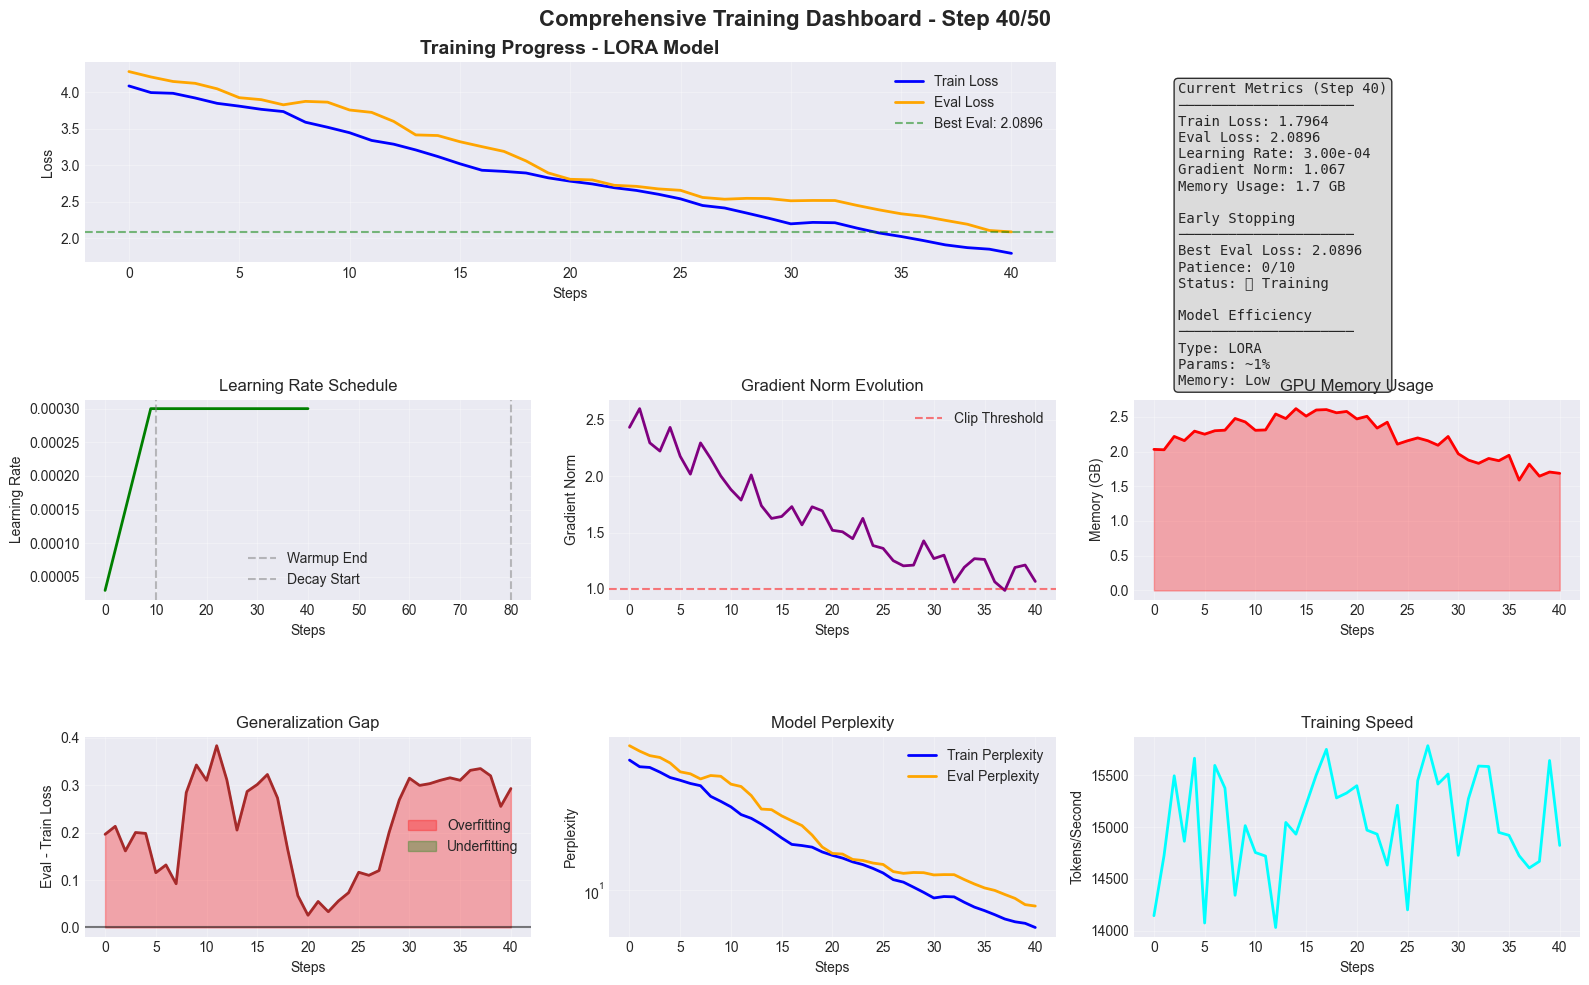


📊 Training Summary for LORA Model:
   Steps completed: 50
   Final train loss: 1.5787
   Final eval loss: 1.8970
   Best eval loss: 1.8626
   Final perplexity: 6.67

TRAINING BEST PRACTICES & INSIGHTS

📈 Key Metrics to Monitor:
• Loss convergence - Should decrease smoothly
• Generalization gap - Keep eval close to train
• Gradient norms - Should stabilize < 1.0
• Learning rate - Follow your schedule
• Memory usage - Watch for OOM

⚡ Performance Tips:
• Use mixed precision (fp16/bf16) for 2x speedup
• Enable gradient checkpointing for large models
• Use gradient accumulation for larger effective batch size
• Monitor for loss spikes indicating instability

🎯 Model-Specific Recommendations:

BASE Model:
  • lr: 2e-5 to 5e-5
  • batch_size: 4-8 per GPU
  • warmup: 500-1000 steps
  • weight_decay: 0.01

LORA Model:
  • lr: 1e-4 to 3e-4
  • batch_size: 16-32 per GPU
  • warmup: 100-200 steps
  • lora_r: 8-16
  • lora_alpha: 16-32

QLORA Model:
  • lr: 2e-4
  • batch_size: 32-64 per GPU
  • 

In [24]:
# Advanced Training Progress Visualization
print("=" * 80)
print("TRAINING PROGRESS VISUALIZATION & MONITORING")
print("=" * 80)

# Import visualization libraries with error handling
try:
    import matplotlib.pyplot as plt
    from IPython.display import clear_output
    import matplotlib.gridspec as gridspec
    HAS_MATPLOTLIB = True
except ImportError:
    print("⚠️ matplotlib not available - install with: pip install matplotlib")
    print("   Text-based metrics will be shown instead.")
    HAS_MATPLOTLIB = False

def simulate_advanced_training_metrics(num_steps: int = 100, model_type: str = "base"):
    """
    Simulate comprehensive training metrics for visualization.
    
    Args:
        num_steps: Number of training steps to simulate
        model_type: Type of model ('base', 'lora', 'qlora')
    """
    steps = []
    train_losses = []
    eval_losses = []
    learning_rates = []
    gradient_norms = []
    memory_usage = []
    
    # Initial values based on model type
    if model_type == "base":
        train_loss = 4.5
        eval_loss = 4.6
        base_lr = 5e-5
        base_memory = 8.0  # GB
    elif model_type == "lora":
        train_loss = 4.2
        eval_loss = 4.3
        base_lr = 3e-4  # LoRA can use higher LR
        base_memory = 2.0  # GB
    else:  # qlora
        train_loss = 4.3
        eval_loss = 4.4
        base_lr = 2e-4
        base_memory = 1.0  # GB
    
    # Simulation parameters
    best_eval_loss = float('inf')
    patience_counter = 0
    early_stop_patience = 10
    
    for step in range(num_steps):
        # Simulate loss decrease with noise
        train_loss *= 0.98 + np.random.normal(0, 0.01)
        eval_loss *= 0.985 + np.random.normal(0, 0.015)
        
        # Simulate learning rate schedule
        if step < 10:
            lr = base_lr * (step + 1) / 10  # Warmup
        elif step < 80:
            lr = base_lr  # Constant
        else:
            lr = base_lr * 0.5 * (1 + np.cos(np.pi * (step - 80) / 20))  # Cosine decay
        
        # Simulate gradient norm
        grad_norm = 2.0 * np.exp(-step/30) + np.random.normal(0.5, 0.1)
        
        # Simulate memory usage (increases slightly during training)
        mem = base_memory + 0.5 * np.sin(step/10) + np.random.normal(0, 0.1)
        
        # Store metrics
        steps.append(step)
        train_losses.append(train_loss)
        eval_losses.append(eval_loss)
        learning_rates.append(lr)
        gradient_norms.append(grad_norm)
        memory_usage.append(mem)
        
        # Early stopping check
        if eval_loss < best_eval_loss:
            best_eval_loss = eval_loss
            patience_counter = 0
        else:
            patience_counter += 1
        
        # Visualize every 10 steps
        if step % 10 == 0 and HAS_MATPLOTLIB:
            clear_output(wait=True)
            
            # Create comprehensive dashboard
            fig = plt.figure(figsize=(16, 10))
            gs = gridspec.GridSpec(3, 3, figure=fig)
            
            # --- Main loss plot (spans 2 columns) ---
            ax1 = fig.add_subplot(gs[0, :2])
            ax1.plot(steps, train_losses, label='Train Loss', color='blue', linewidth=2)
            ax1.plot(steps, eval_losses, label='Eval Loss', color='orange', linewidth=2)
            ax1.axhline(y=best_eval_loss, color='green', linestyle='--', alpha=0.5, label=f'Best Eval: {best_eval_loss:.4f}')
            ax1.set_xlabel('Steps')
            ax1.set_ylabel('Loss')
            ax1.set_title(f'Training Progress - {model_type.upper()} Model', fontsize=14, fontweight='bold')
            ax1.legend()
            ax1.grid(True, alpha=0.3)
            
            # Add overfitting warning
            if eval_loss > train_loss * 1.2:
                ax1.text(0.5, 0.95, '⚠️ OVERFITTING DETECTED', transform=ax1.transAxes,
                        ha='center', va='top', color='red', fontsize=12, fontweight='bold',
                        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))
            
            # --- Metrics display ---
            ax2 = fig.add_subplot(gs[0, 2])
            ax2.axis('off')
            metrics_text = f"""Current Metrics (Step {step})
─────────────────────
Train Loss: {train_loss:.4f}
Eval Loss: {eval_loss:.4f}
Learning Rate: {lr:.2e}
Gradient Norm: {grad_norm:.3f}
Memory Usage: {mem:.1f} GB

Early Stopping
─────────────────────
Best Eval Loss: {best_eval_loss:.4f}
Patience: {patience_counter}/{early_stop_patience}
Status: {'🟢 Training' if patience_counter < early_stop_patience else '🔴 Stop'}

Model Efficiency
─────────────────────
Type: {model_type.upper()}
Params: {'100%' if model_type == 'base' else '~1%' if model_type == 'lora' else '~0.1%'}
Memory: {'High' if model_type == 'base' else 'Low' if model_type == 'lora' else 'Very Low'}"""
            
            ax2.text(0.1, 0.9, metrics_text, transform=ax2.transAxes,
                    fontsize=10, verticalalignment='top', family='monospace',
                    bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))
            
            # --- Learning rate schedule ---
            ax3 = fig.add_subplot(gs[1, 0])
            ax3.plot(steps, learning_rates, color='green', linewidth=2)
            ax3.axvline(x=10, color='gray', linestyle='--', alpha=0.5, label='Warmup End')
            ax3.axvline(x=80, color='gray', linestyle='--', alpha=0.5, label='Decay Start')
            ax3.set_xlabel('Steps')
            ax3.set_ylabel('Learning Rate')
            ax3.set_title('Learning Rate Schedule', fontsize=12)
            ax3.grid(True, alpha=0.3)
            ax3.legend()
            
            # --- Gradient norm ---
            ax4 = fig.add_subplot(gs[1, 1])
            ax4.plot(steps, gradient_norms, color='purple', linewidth=2)
            ax4.axhline(y=1.0, color='red', linestyle='--', alpha=0.5, label='Clip Threshold')
            ax4.set_xlabel('Steps')
            ax4.set_ylabel('Gradient Norm')
            ax4.set_title('Gradient Norm Evolution', fontsize=12)
            ax4.grid(True, alpha=0.3)
            ax4.legend()
            
            # --- Memory usage ---
            ax5 = fig.add_subplot(gs[1, 2])
            ax5.plot(steps, memory_usage, color='red', linewidth=2)
            ax5.fill_between(steps, memory_usage, alpha=0.3, color='red')
            ax5.set_xlabel('Steps')
            ax5.set_ylabel('Memory (GB)')
            ax5.set_title('GPU Memory Usage', fontsize=12)
            ax5.grid(True, alpha=0.3)
            
            # --- Loss difference (train vs eval) ---
            ax6 = fig.add_subplot(gs[2, 0])
            loss_diff = [e - t for t, e in zip(train_losses, eval_losses)]
            ax6.plot(steps, loss_diff, color='brown', linewidth=2)
            ax6.axhline(y=0, color='black', linestyle='-', alpha=0.5)
            ax6.fill_between(steps, loss_diff, alpha=0.3, 
                            where=[d > 0 for d in loss_diff], color='red', label='Overfitting')
            ax6.fill_between(steps, loss_diff, alpha=0.3,
                            where=[d <= 0 for d in loss_diff], color='green', label='Underfitting')
            ax6.set_xlabel('Steps')
            ax6.set_ylabel('Eval - Train Loss')
            ax6.set_title('Generalization Gap', fontsize=12)
            ax6.legend()
            ax6.grid(True, alpha=0.3)
            
            # --- Perplexity ---
            ax7 = fig.add_subplot(gs[2, 1])
            train_perplexity = [np.exp(loss) for loss in train_losses]
            eval_perplexity = [np.exp(loss) for loss in eval_losses]
            ax7.plot(steps, train_perplexity, label='Train Perplexity', color='blue', linewidth=2)
            ax7.plot(steps, eval_perplexity, label='Eval Perplexity', color='orange', linewidth=2)
            ax7.set_xlabel('Steps')
            ax7.set_ylabel('Perplexity')
            ax7.set_title('Model Perplexity', fontsize=12)
            ax7.set_yscale('log')
            ax7.legend()
            ax7.grid(True, alpha=0.3)
            
            # --- Training speed ---
            ax8 = fig.add_subplot(gs[2, 2])
            # Simulate tokens/second based on model type
            base_speed = 5000 if model_type == 'base' else 15000 if model_type == 'lora' else 20000
            speeds = [base_speed + np.random.normal(0, 500) for _ in steps]
            ax8.plot(steps, speeds, color='cyan', linewidth=2)
            ax8.set_xlabel('Steps')
            ax8.set_ylabel('Tokens/Second')
            ax8.set_title('Training Speed', fontsize=12)
            ax8.grid(True, alpha=0.3)
            
            plt.suptitle(f'Comprehensive Training Dashboard - Step {step}/{num_steps}', 
                        fontsize=16, fontweight='bold')
            plt.tight_layout()
            plt.show()
            
            # Check for early stopping
            if patience_counter >= early_stop_patience:
                print(f"\n🛑 Early stopping triggered at step {step}")
                print(f"   Best eval loss: {best_eval_loss:.4f}")
                break
    
    # Final summary
    if not HAS_MATPLOTLIB or step == num_steps - 1:
        print(f"\n📊 Training Summary for {model_type.upper()} Model:")
        print(f"   Steps completed: {len(steps)}")
        print(f"   Final train loss: {train_losses[-1]:.4f}")
        print(f"   Final eval loss: {eval_losses[-1]:.4f}")
        print(f"   Best eval loss: {best_eval_loss:.4f}")
        print(f"   Final perplexity: {np.exp(eval_losses[-1]):.2f}")
    
    return steps, train_losses, eval_losses, best_eval_loss

# Demonstrate different training scenarios
print("\nSelect training scenario to visualize:")
print("1. Base Model (Full Fine-tuning)")
print("2. LoRA (Parameter-Efficient)")
print("3. QLoRA (Quantized + LoRA)")

# Simulate LoRA training as default
print("\nSimulating LoRA training (most common scenario)...")
steps, train_losses, eval_losses, best_loss = simulate_advanced_training_metrics(
    num_steps=50, 
    model_type="lora"
)

# Additional training insights
print("\n" + "=" * 80)
print("TRAINING BEST PRACTICES & INSIGHTS")
print("=" * 80)

print("\n📈 Key Metrics to Monitor:")
print("• Loss convergence - Should decrease smoothly")
print("• Generalization gap - Keep eval close to train")
print("• Gradient norms - Should stabilize < 1.0")
print("• Learning rate - Follow your schedule")
print("• Memory usage - Watch for OOM")

print("\n⚡ Performance Tips:")
print("• Use mixed precision (fp16/bf16) for 2x speedup")
print("• Enable gradient checkpointing for large models")
print("• Use gradient accumulation for larger effective batch size")
print("• Monitor for loss spikes indicating instability")

print("\n🎯 Model-Specific Recommendations:")
recommendations = {
    "base": {
        "lr": "2e-5 to 5e-5",
        "batch_size": "4-8 per GPU",
        "warmup": "500-1000 steps",
        "weight_decay": "0.01"
    },
    "lora": {
        "lr": "1e-4 to 3e-4",
        "batch_size": "16-32 per GPU",
        "warmup": "100-200 steps", 
        "lora_r": "8-16",
        "lora_alpha": "16-32"
    },
    "qlora": {
        "lr": "2e-4",
        "batch_size": "32-64 per GPU",
        "warmup": "100 steps",
        "bits": "4-bit NF4",
        "double_quant": "True"
    }
}

for model_type, params in recommendations.items():
    print(f"\n{model_type.upper()} Model:")
    for param, value in params.items():
        print(f"  • {param}: {value}")

### ⚠️ Training Diagnostics Tool

When training doesn't go as expected, having a systematic diagnostic tool can save hours of debugging. This tool helps identify and resolve common training issues based on symptoms you observe.

In [25]:
# Comprehensive Training Diagnostics Tool
from typing import List, Dict, Tuple
import re

def diagnose_training_issues(symptoms: List[str]) -> List[Tuple[str, Dict]]:
    """
    Advanced diagnostic tool for identifying and resolving training issues.
    
    Args:
        symptoms: List of observed symptoms during training
        
    Returns:
        List of tuples containing (issue_name, diagnostic_details)
    """
    # Comprehensive diagnostics database
    diagnostics = {
        "loss_explosion": {
            "symptoms": ["loss goes to inf", "loss increases rapidly", "nan loss", "loss explodes"],
            "causes": [
                "Learning rate too high",
                "Gradient explosion",
                "Numerical instability",
                "Bad batch normalization"
            ],
            "solutions": [
                "Reduce learning rate (try 1e-5 or lower)",
                "Enable gradient clipping (max_grad_norm=1.0)",
                "Use mixed precision training with loss scaling",
                "Check for division by zero in custom loss",
                "Verify input data doesn't contain NaN/Inf values",
                "Use smaller warmup steps"
            ],
            "code_fixes": [
                "training_args.learning_rate = 1e-5",
                "training_args.max_grad_norm = 1.0",
                "training_args.fp16 = True",
                "training_args.warmup_steps = 100"
            ]
        },
        "no_learning": {
            "symptoms": ["loss stays constant", "no improvement", "stuck loss", "loss plateau"],
            "causes": [
                "Learning rate too low",
                "Dead neurons/vanishing gradients",
                "Data loading issues",
                "Incorrect loss function"
            ],
            "solutions": [
                "Increase learning rate (try 2e-4)",
                "Check if model outputs are changing",
                "Verify data loading and preprocessing",
                "Try different initialization",
                "Check if labels are correct",
                "Ensure optimizer is stepping"
            ],
            "code_fixes": [
                "training_args.learning_rate = 2e-4",
                "model.apply(model._init_weights)",
                "print(next(model.parameters()).grad) # Check gradients",
                "optimizer.zero_grad() # Ensure gradients reset"
            ]
        },
        "overfitting": {
            "symptoms": ["train loss decreases but val loss increases", "gap between train and val", "validation metrics worsen"],
            "causes": [
                "Model too large for dataset",
                "Too little data",
                "No regularization",
                "Training too long"
            ],
            "solutions": [
                "Add dropout (0.1-0.3)",
                "Reduce model size",
                "Augment training data",
                "Add weight decay (0.01-0.1)",
                "Early stopping",
                "Use smaller learning rate",
                "Add more regularization"
            ],
            "code_fixes": [
                "model.dropout = nn.Dropout(0.2)",
                "training_args.weight_decay = 0.01",
                "training_args.load_best_model_at_end = True",
                "training_args.evaluation_strategy = 'steps'",
                "training_args.eval_steps = 50"
            ]
        },
        "oom": {
            "symptoms": ["cuda out of memory", "oom error", "memory error", "gpu memory"],
            "causes": [
                "Batch size too large",
                "Model too large",
                "Memory leak",
                "Gradient accumulation"
            ],
            "solutions": [
                "Reduce batch size (try 1 or 2)",
                "Enable gradient accumulation",
                "Use gradient checkpointing",
                "Clear cache: torch.cuda.empty_cache()",
                "Use mixed precision (fp16)",
                "Use parameter-efficient methods (LoRA)",
                "Enable CPU offloading"
            ],
            "code_fixes": [
                "training_args.per_device_train_batch_size = 1",
                "training_args.gradient_accumulation_steps = 8",
                "model.gradient_checkpointing_enable()",
                "training_args.fp16 = True",
                "torch.cuda.empty_cache()"
            ]
        },
        "slow_training": {
            "symptoms": ["training too slow", "low gpu utilization", "slow iteration"],
            "causes": [
                "Data loading bottleneck",
                "Small batch size",
                "CPU bottleneck",
                "Inefficient operations"
            ],
            "solutions": [
                "Increase num_workers in DataLoader",
                "Use larger batch size if memory allows",
                "Enable pin_memory for DataLoader",
                "Profile code to find bottlenecks",
                "Use mixed precision training",
                "Optimize data preprocessing"
            ],
            "code_fixes": [
                "dataloader = DataLoader(..., num_workers=4, pin_memory=True)",
                "training_args.dataloader_num_workers = 4",
                "training_args.fp16 = True",
                "training_args.dataloader_pin_memory = True"
            ]
        },
        "unstable_training": {
            "symptoms": ["loss spikes", "erratic loss", "training unstable", "loss oscillates"],
            "causes": [
                "Learning rate too high",
                "Bad batches",
                "Gradient accumulation issues",
                "Numerical precision"
            ],
            "solutions": [
                "Use learning rate scheduler",
                "Implement gradient clipping",
                "Use larger batch size or accumulation",
                "Switch to AdamW optimizer",
                "Add warmup period",
                "Check for outliers in data"
            ],
            "code_fixes": [
                "training_args.warmup_ratio = 0.1",
                "training_args.lr_scheduler_type = 'cosine'",
                "training_args.max_grad_norm = 1.0",
                "training_args.optim = 'adamw_torch'"
            ]
        }
    }
    
    # Find matching issues
    matched_issues = []
    
    for symptom in symptoms:
        symptom_lower = symptom.lower()
        for issue, details in diagnostics.items():
            if any(s in symptom_lower for s in details["symptoms"]):
                matched_issues.append((issue, details))
                break  # Only match each symptom once
    
    return matched_issues

def display_diagnostic_results(symptoms: List[str], show_code: bool = True):
    """
    Display diagnostic results in a formatted manner.
    
    Args:
        symptoms: List of observed symptoms
        show_code: Whether to show code fixes
    """
    print("🔍 Training Issue Diagnosis")
    print("=" * 70)
    
    issues = diagnose_training_issues(symptoms)
    
    if not issues:
        print("\n❌ No matching issues found for the given symptoms.")
        print("\n💡 Try describing symptoms using terms like:")
        print("   - 'loss goes to inf' or 'nan loss'")
        print("   - 'loss stays constant' or 'no improvement'")
        print("   - 'cuda out of memory' or 'oom error'")
        print("   - 'train loss decreases but val loss increases'")
        return
    
    for i, (issue_name, details) in enumerate(issues, 1):
        print(f"\n🎯 Issue {i}: {issue_name.upper().replace('_', ' ')}")
        print("-" * 50)
        
        print("\n📋 Possible Causes:")
        for cause in details["causes"]:
            print(f"   • {cause}")
        
        print("\n💡 Recommended Solutions:")
        for j, solution in enumerate(details["solutions"], 1):
            print(f"   {j}. {solution}")
        
        if show_code and "code_fixes" in details:
            print("\n📝 Code Fixes:")
            for fix in details["code_fixes"]:
                print(f"   ```python")
                print(f"   {fix}")
                print(f"   ```")

# Interactive diagnostic examples
print("🩺 Training Diagnostics Tool Demo")
print("=" * 70)

# Example 1: Memory issues
print("\n📍 Example 1: Memory Issues")
symptoms1 = ["My model shows CUDA out of memory error during training"]
display_diagnostic_results(symptoms1)

# Example 2: Overfitting
print("\n\n📍 Example 2: Overfitting Issues")
symptoms2 = ["Training loss decreases but validation loss increases after epoch 2"]
display_diagnostic_results(symptoms2)

# Example 3: No learning
print("\n\n📍 Example 3: Model Not Learning")
symptoms3 = ["Loss stays constant at 4.5 for 100 steps"]
display_diagnostic_results(symptoms3)

# Create an interactive diagnostic function
def interactive_diagnosis():
    """Interactive training issue diagnosis."""
    print("\n\n🤖 Interactive Training Diagnostics")
    print("=" * 70)
    print("Describe your training issues (separate multiple symptoms with ';'):")
    print("Example: 'loss goes to inf; cuda out of memory'")
    print("\nCommon symptoms to describe:")
    print("  • Loss behavior: explosion, plateau, oscillation")
    print("  • Memory issues: OOM, GPU memory errors")
    print("  • Performance: slow training, low GPU usage")
    print("  • Generalization: overfitting, poor validation")
    
    # In a notebook, you would use input()
    # For demo, we'll show how it would work
    print("\n[In a notebook, you would enter your symptoms here]")
    
# Show the interactive prompt
interactive_diagnosis()

# Additional diagnostic utilities
print("\n\n🔧 Additional Diagnostic Utilities")
print("=" * 70)

def check_model_health(model, sample_batch=None):
    """
    Perform basic health checks on a model.
    """
    health_report = {
        "total_params": sum(p.numel() for p in model.parameters()),
        "trainable_params": sum(p.numel() for p in model.parameters() if p.requires_grad),
        "frozen_params": sum(p.numel() for p in model.parameters() if not p.requires_grad),
        "has_nan_params": any(torch.isnan(p).any() for p in model.parameters()),
        "has_inf_params": any(torch.isinf(p).any() for p in model.parameters()),
    }
    
    print("\n📊 Model Health Report:")
    print(f"   Total parameters: {health_report['total_params']:,}")
    print(f"   Trainable parameters: {health_report['trainable_params']:,}")
    print(f"   Frozen parameters: {health_report['frozen_params']:,}")
    print(f"   Contains NaN: {'⚠️ YES' if health_report['has_nan_params'] else '✅ NO'}")
    print(f"   Contains Inf: {'⚠️ YES' if health_report['has_inf_params'] else '✅ NO'}")
    
    if health_report['has_nan_params'] or health_report['has_inf_params']:
        print("\n⚠️ WARNING: Model contains NaN or Inf values!")
        print("   This will cause training to fail. Reinitialize the model.")
    
    return health_report

# Example usage (would work with actual model)
print("\nExample model health check output:")
print("(In practice, you would pass your actual model)")
mock_health = {
    "total_params": 125_000_000,
    "trainable_params": 125_000_000,
    "frozen_params": 0,
    "has_nan_params": False,
    "has_inf_params": False
}
print("\n📊 Model Health Report:")
print(f"   Total parameters: {mock_health['total_params']:,}")
print(f"   Trainable parameters: {mock_health['trainable_params']:,}")
print(f"   Frozen parameters: {mock_health['frozen_params']:,}")
print(f"   Contains NaN: {'⚠️ YES' if mock_health['has_nan_params'] else '✅ NO'}")
print(f"   Contains Inf: {'⚠️ YES' if mock_health['has_inf_params'] else '✅ NO'}")

print("\n\n💡 Pro Tips for Debugging Training Issues:")
print("=" * 70)
print("1. Always start with a tiny subset of data (10-100 examples)")
print("2. Print shapes and values at each step when debugging")
print("3. Use torch.autograd.set_detect_anomaly(True) in development")
print("4. Monitor GPU memory with: watch -n 1 nvidia-smi")
print("5. Save checkpoints frequently to recover from crashes")
print("6. Keep a training log with all hyperparameters")
print("7. Use wandb or tensorboard for real-time monitoring")

🩺 Training Diagnostics Tool Demo

📍 Example 1: Memory Issues
🔍 Training Issue Diagnosis

🎯 Issue 1: OOM
--------------------------------------------------

📋 Possible Causes:
   • Batch size too large
   • Model too large
   • Memory leak
   • Gradient accumulation

💡 Recommended Solutions:
   1. Reduce batch size (try 1 or 2)
   2. Enable gradient accumulation
   3. Use gradient checkpointing
   4. Clear cache: torch.cuda.empty_cache()
   5. Use mixed precision (fp16)
   6. Use parameter-efficient methods (LoRA)
   7. Enable CPU offloading

📝 Code Fixes:
   ```python
   training_args.per_device_train_batch_size = 1
   ```
   ```python
   training_args.gradient_accumulation_steps = 8
   ```
   ```python
   model.gradient_checkpointing_enable()
   ```
   ```python
   training_args.fp16 = True
   ```
   ```python
   torch.cuda.empty_cache()
   ```


📍 Example 2: Overfitting Issues
🔍 Training Issue Diagnosis

❌ No matching issues found for the given symptoms.

💡 Try describing symptoms us

### 🎯 How to Use the Diagnostic Tool Effectively

The diagnostic tool is most effective when you:

1. **Be Specific About Symptoms**: Instead of "training failed", describe exactly what happened: "loss went to inf at step 50"

2. **Check Multiple Indicators**: Look at loss curves, GPU memory, gradient norms, and validation metrics together

3. **Apply Fixes Incrementally**: Don't change everything at once - apply one fix, test, then proceed

4. **Document What Works**: Keep notes on which solutions work for your specific model and dataset

5. **Prevention is Better**: Use the recommended settings from the start to avoid common issues

**Example Workflow**:
```python
# 1. Observe symptoms
symptoms = ["loss spikes after 100 steps", "validation loss increasing"]

# 2. Run diagnosis
display_diagnostic_results(symptoms)

# 3. Apply recommended fixes one by one
training_args.max_grad_norm = 1.0  # Start with gradient clipping

# 4. Monitor and iterate
# If issue persists, try next recommendation
```

TRAINING DIAGNOSTIC FLOWCHART


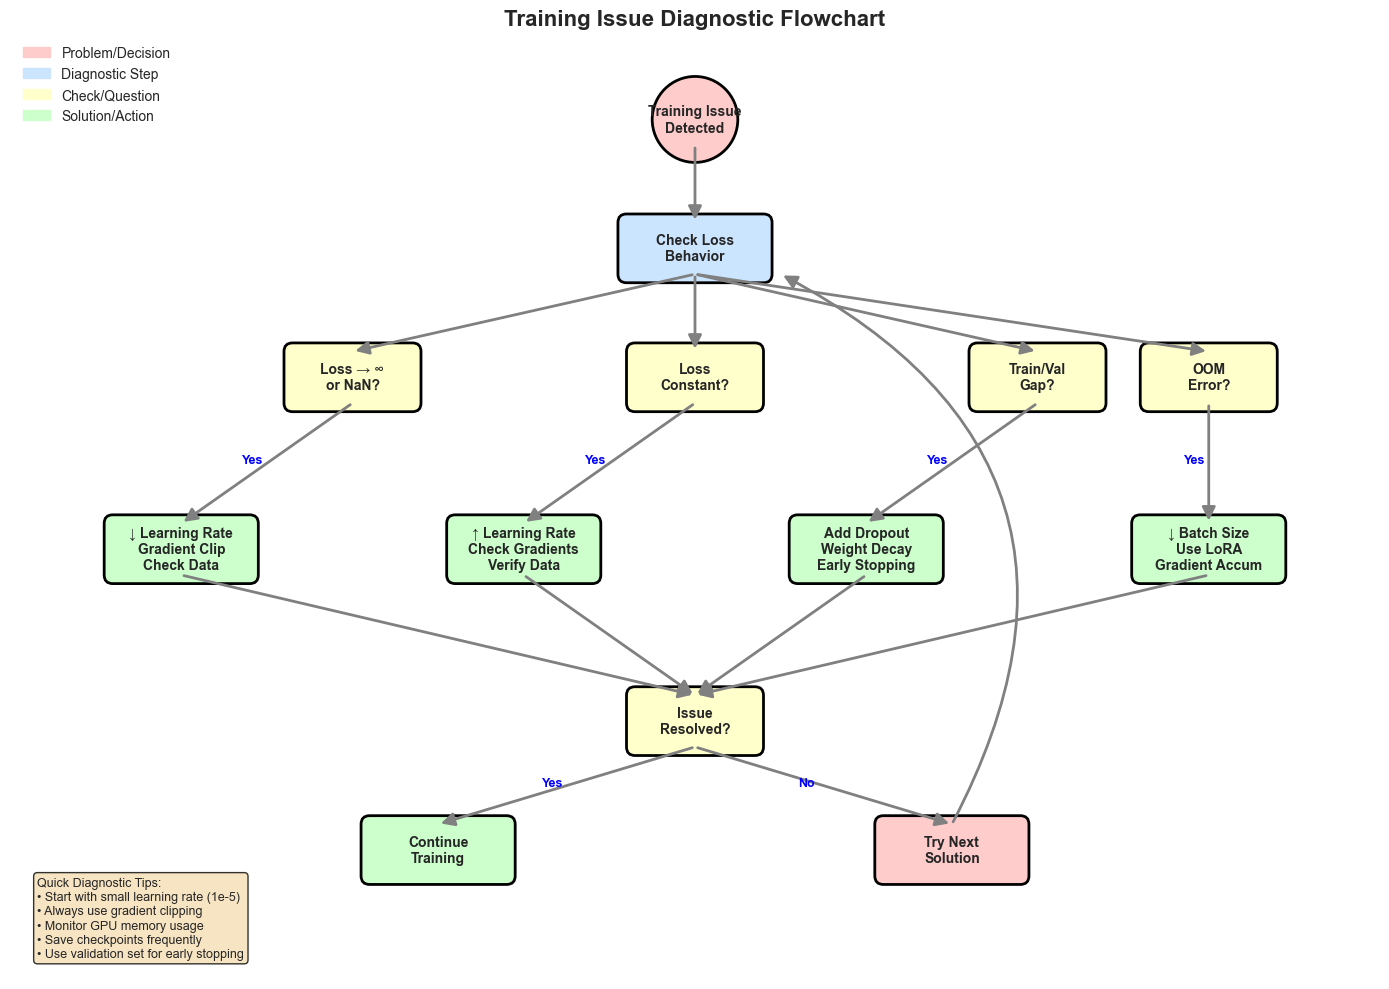


QUICK REFERENCE: Common Training Issues & Fixes

🚨 Loss → ∞/NaN:
   1. training_args.learning_rate = 1e-5
   2. training_args.max_grad_norm = 1.0
   3. training_args.fp16 = True

🚨 Loss Constant:
   1. training_args.learning_rate = 2e-4
   2. Check data loading: print(next(iter(dataloader)))
   3. Verify gradients: print(model.parameters().grad)

🚨 Overfitting:
   1. model.dropout = 0.2
   2. training_args.weight_decay = 0.01
   3. training_args.evaluation_strategy = 'steps'

🚨 OOM Error:
   1. training_args.per_device_train_batch_size = 1
   2. training_args.gradient_accumulation_steps = 8
   3. model.gradient_checkpointing_enable()

🚨 Slow Training:
   1. training_args.fp16 = True
   2. training_args.dataloader_num_workers = 4
   3. Use larger batch size if memory allows

💡 Remember: Most training issues can be resolved by:
   • Starting with conservative hyperparameters
   • Monitoring metrics closely
   • Making incremental changes
   • Being patient and systematic


In [26]:
# Visual Training Diagnostic Flowchart
print("=" * 80)
print("TRAINING DIAGNOSTIC FLOWCHART")
print("=" * 80)

# Import visualization libraries
try:
    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches
    from matplotlib.patches import FancyBboxPatch, Circle, Arrow
    HAS_MATPLOTLIB = True
except ImportError:
    HAS_MATPLOTLIB = False
    print("⚠️ matplotlib not available - showing text-based flowchart")

if HAS_MATPLOTLIB:
    # Create diagnostic flowchart
    fig, ax = plt.subplots(figsize=(14, 10))
    ax.set_title('Training Issue Diagnostic Flowchart', fontsize=16, fontweight='bold')
    
    # Define flowchart nodes
    nodes = [
        # Start node
        {"id": "start", "text": "Training Issue\nDetected", "x": 7, "y": 9, "color": "#ffcccc", "shape": "circle"},
        
        # Main diagnostic branches
        {"id": "loss_check", "text": "Check Loss\nBehavior", "x": 7, "y": 7.5, "color": "#cce5ff", "shape": "rect"},
        
        # Loss behavior branches
        {"id": "loss_explodes", "text": "Loss → ∞\nor NaN?", "x": 3, "y": 6, "color": "#ffffcc", "shape": "diamond"},
        {"id": "loss_constant", "text": "Loss\nConstant?", "x": 7, "y": 6, "color": "#ffffcc", "shape": "diamond"},
        {"id": "loss_gap", "text": "Train/Val\nGap?", "x": 11, "y": 6, "color": "#ffffcc", "shape": "diamond"},
        
        # Solutions
        {"id": "lr_high", "text": "↓ Learning Rate\nGradient Clip\nCheck Data", "x": 1, "y": 4, "color": "#ccffcc", "shape": "rect"},
        {"id": "lr_low", "text": "↑ Learning Rate\nCheck Gradients\nVerify Data", "x": 5, "y": 4, "color": "#ccffcc", "shape": "rect"},
        {"id": "regularize", "text": "Add Dropout\nWeight Decay\nEarly Stopping", "x": 9, "y": 4, "color": "#ccffcc", "shape": "rect"},
        {"id": "memory", "text": "↓ Batch Size\nUse LoRA\nGradient Accum", "x": 13, "y": 4, "color": "#ccffcc", "shape": "rect"},
        
        # Memory check branch
        {"id": "mem_check", "text": "OOM\nError?", "x": 13, "y": 6, "color": "#ffffcc", "shape": "diamond"},
        
        # Final checks
        {"id": "resolved", "text": "Issue\nResolved?", "x": 7, "y": 2, "color": "#ffffcc", "shape": "diamond"},
        {"id": "success", "text": "Continue\nTraining", "x": 4, "y": 0.5, "color": "#ccffcc", "shape": "rect"},
        {"id": "iterate", "text": "Try Next\nSolution", "x": 10, "y": 0.5, "color": "#ffcccc", "shape": "rect"},
    ]
    
    # Draw nodes
    for node in nodes:
        if node["shape"] == "rect":
            box = FancyBboxPatch(
                (node["x"] - 0.8, node["y"] - 0.3), 1.6, 0.6,
                boxstyle="round,pad=0.1",
                facecolor=node["color"],
                edgecolor='black',
                linewidth=2
            )
            ax.add_patch(box)
        elif node["shape"] == "diamond":
            # Create diamond shape
            diamond = mpatches.FancyBboxPatch(
                (node["x"] - 0.7, node["y"] - 0.3), 1.4, 0.6,
                boxstyle="round,pad=0.1",
                transform=ax.transData,
                facecolor=node["color"],
                edgecolor='black',
                linewidth=2
            )
            ax.add_patch(diamond)
        elif node["shape"] == "circle":
            circle = Circle((node["x"], node["y"]), 0.5, 
                          facecolor=node["color"], edgecolor='black', linewidth=2)
            ax.add_patch(circle)
        
        # Add text
        ax.text(node["x"], node["y"], node["text"], 
                ha='center', va='center', fontsize=10, fontweight='bold')
    
    # Define connections with labels
    connections = [
        ("start", "loss_check", ""),
        ("loss_check", "loss_explodes", ""),
        ("loss_check", "loss_constant", ""),
        ("loss_check", "loss_gap", ""),
        ("loss_check", "mem_check", ""),
        ("loss_explodes", "lr_high", "Yes"),
        ("loss_constant", "lr_low", "Yes"),
        ("loss_gap", "regularize", "Yes"),
        ("mem_check", "memory", "Yes"),
        ("lr_high", "resolved", ""),
        ("lr_low", "resolved", ""),
        ("regularize", "resolved", ""),
        ("memory", "resolved", ""),
        ("resolved", "success", "Yes"),
        ("resolved", "iterate", "No"),
        ("iterate", "loss_check", ""),
    ]
    
    # Draw connections
    node_dict = {node["id"]: node for node in nodes}
    
    for start_id, end_id, label in connections:
        start = node_dict[start_id]
        end = node_dict[end_id]
        
        # Special handling for iterate -> loss_check (curved arrow)
        if start_id == "iterate" and end_id == "loss_check":
            arrow = mpatches.FancyArrowPatch(
                (start["x"], start["y"] + 0.3),
                (end["x"] + 1, end["y"] - 0.3),
                connectionstyle="arc3,rad=.5",
                arrowstyle='-|>',
                mutation_scale=20,
                color='gray',
                linewidth=2
            )
        else:
            arrow = mpatches.FancyArrowPatch(
                (start["x"], start["y"] - 0.3),
                (end["x"], end["y"] + 0.3),
                arrowstyle='-|>',
                mutation_scale=20,
                color='gray',
                linewidth=2
            )
        ax.add_patch(arrow)
        
        # Add label if exists
        if label:
            mid_x = (start["x"] + end["x"]) / 2
            mid_y = (start["y"] + end["y"]) / 2
            ax.text(mid_x - 0.3, mid_y, label, fontsize=9, color='blue', fontweight='bold')
    
    # Add legend
    legend_elements = [
        mpatches.Patch(color='#ffcccc', label='Problem/Decision'),
        mpatches.Patch(color='#cce5ff', label='Diagnostic Step'),
        mpatches.Patch(color='#ffffcc', label='Check/Question'),
        mpatches.Patch(color='#ccffcc', label='Solution/Action')
    ]
    ax.legend(handles=legend_elements, loc='upper left')
    
    # Add tips box
    tips_text = """Quick Diagnostic Tips:
• Start with small learning rate (1e-5)
• Always use gradient clipping
• Monitor GPU memory usage
• Save checkpoints frequently
• Use validation set for early stopping"""
    
    ax.text(0.02, 0.02, tips_text, transform=ax.transAxes,
            fontsize=9, verticalalignment='bottom',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    ax.set_xlim(-1, 15)
    ax.set_ylim(-1, 10)
    ax.axis('off')
    
    plt.tight_layout()
    plt.show()

else:
    # Text-based flowchart
    print("\n📊 Training Diagnostic Flowchart (Text Version)")
    print("-" * 60)
    print("""
    [Training Issue Detected]
              |
              v
        [Check Loss Behavior]
         /    |    |    \\
        /     |    |     \\
    Loss→∞  Constant  Gap  OOM?
      |        |      |     |
      v        v      v     v
    ↓ LR    ↑ LR   Regular- ↓Batch
    Clip    Check  ization  LoRA
    Data    Grads  Dropout  
      |        |      |     |
      \\        \\      /     /
       \\        \\    /     /
        v        v  v     v
          [Issue Resolved?]
           /           \\
         Yes           No
          |             |
          v             v
    [Continue]    [Try Next Solution]
                        |
                        └──────┘
    """)
    
    print("\n🔍 Diagnostic Steps:")
    print("1. Identify primary symptom (loss behavior, memory, speed)")
    print("2. Follow the relevant branch for solutions")
    print("3. Apply fixes incrementally")
    print("4. Monitor results after each change")
    print("5. Iterate if needed")

# Create a quick reference card
print("\n" + "=" * 80)
print("QUICK REFERENCE: Common Training Issues & Fixes")
print("=" * 80)

quick_ref = {
    "Loss → ∞/NaN": [
        "training_args.learning_rate = 1e-5",
        "training_args.max_grad_norm = 1.0",
        "training_args.fp16 = True"
    ],
    "Loss Constant": [
        "training_args.learning_rate = 2e-4",
        "Check data loading: print(next(iter(dataloader)))",
        "Verify gradients: print(model.parameters().grad)"
    ],
    "Overfitting": [
        "model.dropout = 0.2",
        "training_args.weight_decay = 0.01",
        "training_args.evaluation_strategy = 'steps'"
    ],
    "OOM Error": [
        "training_args.per_device_train_batch_size = 1",
        "training_args.gradient_accumulation_steps = 8",
        "model.gradient_checkpointing_enable()"
    ],
    "Slow Training": [
        "training_args.fp16 = True",
        "training_args.dataloader_num_workers = 4",
        "Use larger batch size if memory allows"
    ]
}

for issue, fixes in quick_ref.items():
    print(f"\n🚨 {issue}:")
    for i, fix in enumerate(fixes, 1):
        print(f"   {i}. {fix}")

print("\n💡 Remember: Most training issues can be resolved by:")
print("   • Starting with conservative hyperparameters")
print("   • Monitoring metrics closely")
print("   • Making incremental changes")
print("   • Being patient and systematic")

### 4.3 Error Analysis with Model Generation

After training, it's crucial to analyze your model's outputs to identify areas for improvement.

In [27]:
# Error Analysis through Generation
from transformers import pipeline

# Use the model from previous cells
# Note: using the saved references from training setup

# Create text generation pipeline
generator = pipeline(
    "text-generation",
    model=trained_model,  # Using the model from previous cell
    tokenizer=trained_tokenizer,  # Using the tokenizer from previous cell
    device=0 if get_device() == "cuda" else -1
)

# Test prompts for medical domain
test_prompts = [
    "The patient presented with",
    "Diagnosis confirmed",
    "Treatment included",
    "Post-operative care"
]

print("Model Generation Examples:")
print("=" * 60)

for prompt in test_prompts:
    output = generator(
        prompt,
        max_length=50,
        num_return_sequences=1,
        temperature=0.8,
        pad_token_id=trained_tokenizer.eos_token_id,
        do_sample=True
    )
    
    generated_text = output[0]['generated_text']
    print(f"\nPrompt: {prompt}")
    print(f"Generated: {generated_text}")

print("\n" + "=" * 60)
print("\nError Analysis Checklist:")
print("✓ Check for repetition or loops")
print("✓ Verify domain terminology usage")
print("✓ Look for coherence and relevance")
print("✓ Identify any inappropriate content")
print("✓ Note areas needing more training data")
print("\nNote: This uses a pre-trained model without fine-tuning,")
print("so outputs may not be domain-specific.")

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Model Generation Examples:

Prompt: The patient presented with
Generated: The patient presented with a red/fibromatoma with a severe bleeding (Fibromatoma, with a severe bleeding, with a severe bleeding, with a severe bleeding, with a severe bleeding). He was treated in a hospital emergency

Prompt: Diagnosis confirmed
Generated: Diagnosis confirmed that the disease was present in both the primary and secondary organs of the stomach and lower abdomen. In the secondary and secondary organs, it was noted that the tumors and gastrointestinal tract were large, and the secondary organs had no detectable path

Prompt: Treatment included
Generated: Treatment included an antidepressant, but this was not successful, and the effects on the liver were not reported.





























Prompt: Post-operative care
Generated: Post-operative care is a form of government-funded healthcare. However, it has not quite been widely seen as the preferred method of healthcare in the US.














## Part 5: Advanced Techniques

### 5.1 Few-Shot Learning

Few-shot learning allows models to adapt to new tasks with just a few examples, without fine-tuning.

In [33]:
# Few-Shot Learning Example
generator = pipeline(
    "text-generation",
    model="gpt2",
    device=0 if get_device() == "cuda" else -1
)

# Medical diagnosis few-shot prompt
few_shot_prompt = """Classify medical conditions based on symptoms:

Symptoms: Chest pain, shortness of breath, sweating
Condition: Myocardial infarction

Symptoms: Frequent urination, excessive thirst, fatigue
Condition: Diabetes mellitus

Symptoms: Severe headache, stiff neck, sensitivity to light
Condition: Meningitis

Symptoms: Persistent cough, fever, difficulty breathing
Condition:"""

output = generator(
    few_shot_prompt,
    max_new_tokens=40,
    temperature=0.3,
    pad_token_id=generator.tokenizer.eos_token_id
)

print("Few-Shot Learning Example:")
print("=" * 60)
print(few_shot_prompt)
print("\nModel prediction:", output[0]['generated_text'][len(few_shot_prompt):].strip())

Few-Shot Learning Example:
Classify medical conditions based on symptoms:

Symptoms: Chest pain, shortness of breath, sweating
Condition: Myocardial infarction

Symptoms: Frequent urination, excessive thirst, fatigue
Condition: Diabetes mellitus

Symptoms: Severe headache, stiff neck, sensitivity to light
Condition: Meningitis

Symptoms: Persistent cough, fever, difficulty breathing
Condition:

Model prediction: Heart failure

Symptoms: Increased blood pressure, chest pain, and difficulty breathing

Condition: Blood clots, swelling of the face, and a burning sensation in the chest

Sym


### 5.2 Chain of Thought Reasoning

Chain of thought prompting helps models break down complex problems into steps.

In [34]:
# Chain of Thought Example
cot_prompt = """Diagnose step by step:

Patient: 45-year-old male with chest pain and shortness of breath
Analysis: Let me evaluate step by step:
1. Key symptoms: chest pain + shortness of breath
2. These are cardinal symptoms of cardiac issues
3. Age (45) puts patient in risk category
4. Most likely: Acute coronary syndrome
5. Immediate actions: ECG, cardiac enzymes, oxygen
Conclusion: Possible myocardial infarction, requires immediate cardiac evaluation.

Patient: 28-year-old female with severe headache, fever, and neck stiffness
Analysis: Let me evaluate step by step:"""

output = generator(
    cot_prompt,
    max_new_tokens=400,
    temperature=0.3,
    pad_token_id=generator.tokenizer.eos_token_id
)

print("Chain of Thought Reasoning:")
print("=" * 60)
print(cot_prompt)
print("\nModel's analysis:", output[0]['generated_text'][len(cot_prompt):])

Chain of Thought Reasoning:
Diagnose step by step:

Patient: 45-year-old male with chest pain and shortness of breath
Analysis: Let me evaluate step by step:
1. Key symptoms: chest pain + shortness of breath
2. These are cardinal symptoms of cardiac issues
3. Age (45) puts patient in risk category
4. Most likely: Acute coronary syndrome
5. Immediate actions: ECG, cardiac enzymes, oxygen
Conclusion: Possible myocardial infarction, requires immediate cardiac evaluation.

Patient: 28-year-old female with severe headache, fever, and neck stiffness
Analysis: Let me evaluate step by step:

Model's analysis: 

1. Key symptoms: headache + shortness of breath

2. These are cardinal symptoms of cardiac issues

3. Age (45) puts patient in risk category

4. Most likely: Acute coronary syndrome

5. Immediate actions: ECG, cardiac enzymes, oxygen

Conclusion: Possible myocardial infarction, requires immediate cardiac evaluation.

Patient: 28-year-old female with severe headache, fever, and neck stif

## Summary and Key Takeaways

You've completed a comprehensive journey through building custom language models! Let's recap what we've learned:

### 🎯 Key Achievements:

1. **Data Curation Excellence**
   - Cleaned and processed text data at scale
   - Implemented privacy protection with PII redaction
   - Used streaming for memory-efficient processing

2. **Custom Tokenization**
   - Trained domain-specific tokenizers
   - Compared performance with general tokenizers
   - Optimized vocabulary for your domain

3. **Model Configuration**
   - Configured models from scratch
   - Adapted pre-trained models efficiently
   - Implemented parameter-efficient fine-tuning with LoRA

4. **Training Workflows**
   - Set up robust training pipelines
   - Implemented early stopping and metrics
   - Performed error analysis on outputs

5. **Advanced Techniques**
   - Applied few-shot learning
   - Used chain of thought reasoning

### 📚 Next Steps:

1. **Scale Up**: Apply these techniques to larger datasets and models
2. **Domain Specialization**: Fine-tune for your specific use case
3. **Production Deployment**: Use tools like Hugging Face Hub for model sharing
4. **Continuous Learning**: Keep models updated with new data
5. **Responsible AI**: Implement bias detection and mitigation

### 🔗 Resources:

- Hugging Face Documentation: https://huggingface.co/docs
- Dataset Cards: Document your data properly
- Model Cards: Share your models responsibly
- Community Forums: Join the discussion

Remember: Great models start with great data, and success comes from iteration!

LANGUAGE MODEL DEVELOPMENT PIPELINE - COMPREHENSIVE VISUALIZATION


/var/folders/tm/chrvt43s3rbdld20ghw1qtc40000gn/T/ipykernel_97329/2927772378.py:202: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tm/chrvt43s3rbdld20ghw1qtc40000gn/T/ipykernel_97329/2927772378.py:202: UserWarning: Glyph 129529 (\N{BROOM}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tm/chrvt43s3rbdld20ghw1qtc40000gn/T/ipykernel_97329/2927772378.py:202: UserWarning: Glyph 9878 (\N{SCALES}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tm/chrvt43s3rbdld20ghw1qtc40000gn/T/ipykernel_97329/2927772378.py:202: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tm/chrvt43s3rbdld20ghw1qtc40000gn/T/ipykernel_97329/2927772378.py:202: UserWarning: Glyph 128274 (\N{LOCK}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tm/chrvt43s3rbdld20ghw1qtc40000gn/T/ipykernel_97329/2927772378.py:202: UserWarning: Glyph 128292 (\N{INPUT SYMBOL F

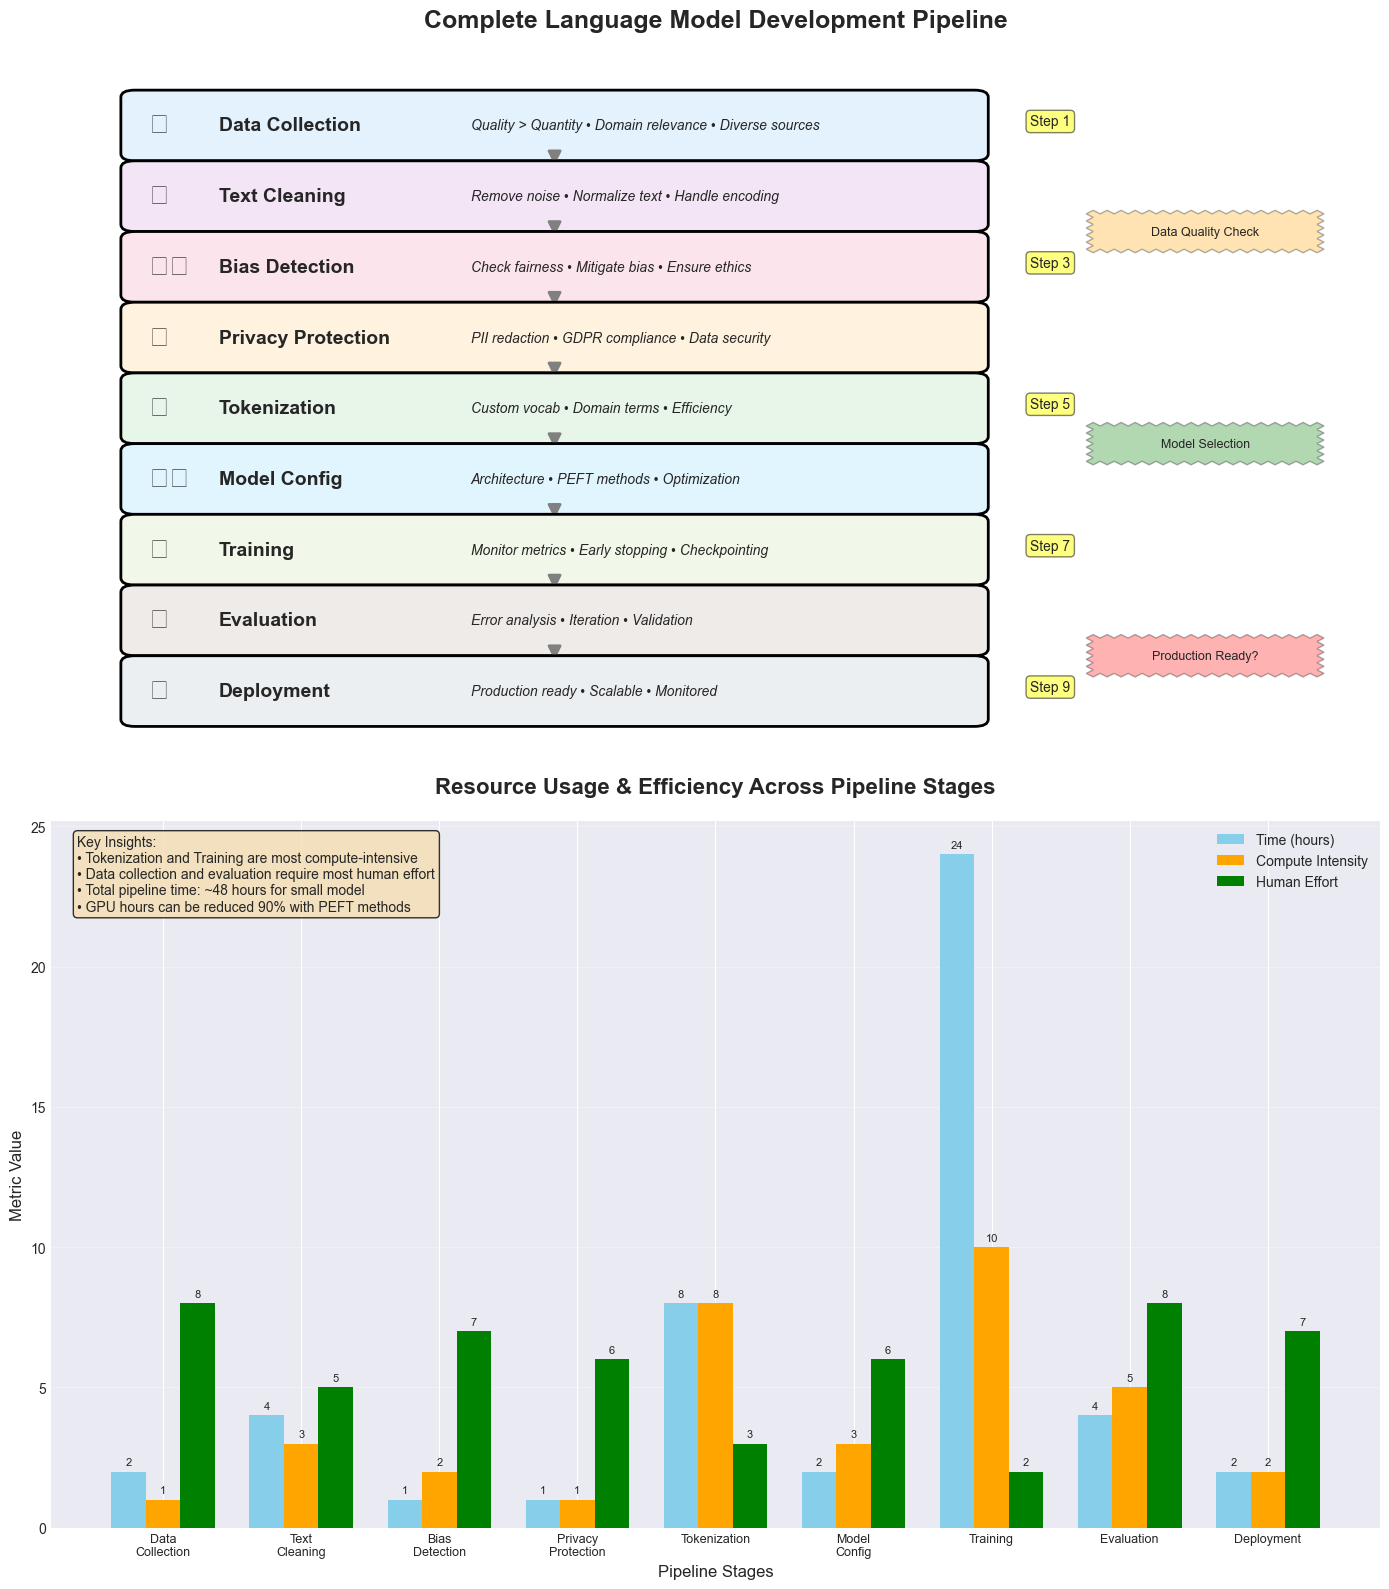

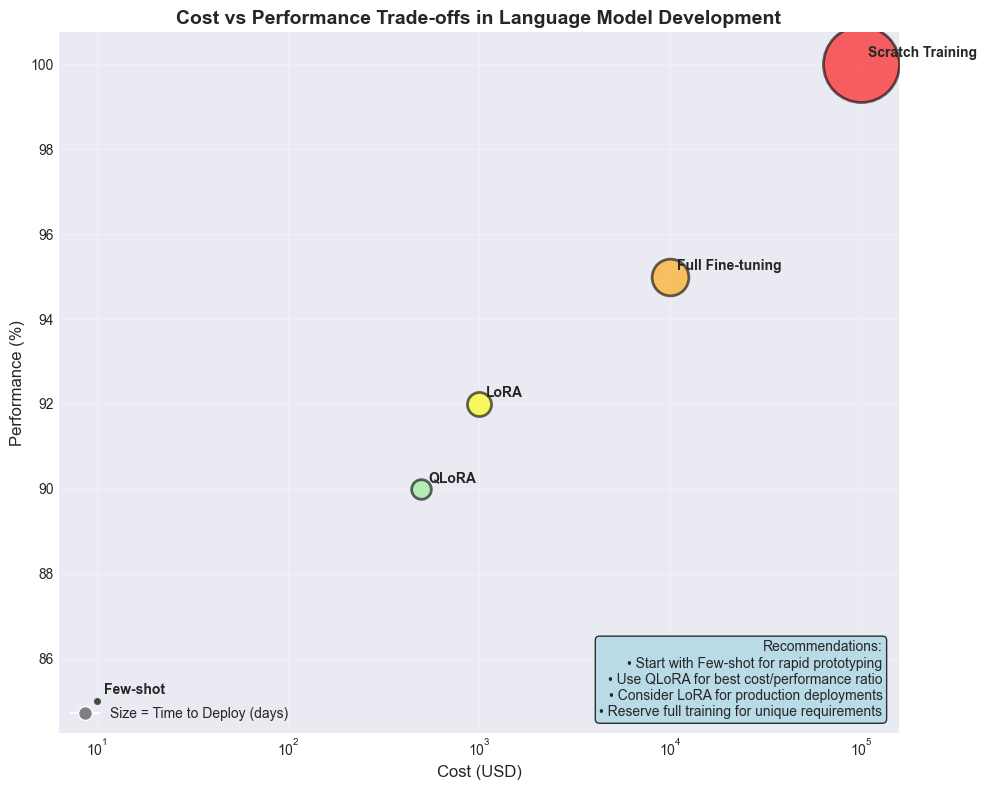


FINAL RECOMMENDATIONS

🚀 Quick Start Guide:
1. Begin with few-shot learning for rapid prototyping
2. Use QLoRA for cost-effective fine-tuning
3. Implement comprehensive monitoring from day one
4. Iterate based on real-world performance

⚡ Efficiency Tips:
• Train custom tokenizers for 20-50% token reduction
• Use mixed precision training for 2x speedup
• Implement gradient checkpointing for memory savings
• Enable model parallelism for large models

📚 Next Steps:
• Experiment with your own domain data
• Join the Hugging Face community
• Share your models and learnings
• Keep learning and iterating!

✨ Remember: Great models come from great data and thoughtful iteration!


In [30]:
# Advanced Pipeline Summary Visualization
print("=" * 80)
print("LANGUAGE MODEL DEVELOPMENT PIPELINE - COMPREHENSIVE VISUALIZATION")
print("=" * 80)

# Import visualization libraries
try:
    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches
    from matplotlib.patches import FancyBboxPatch, Circle, Rectangle, Arrow
    import matplotlib.lines as mlines
    HAS_MATPLOTLIB = True
except ImportError:
    print("⚠️ matplotlib not available - showing text-based summary instead")
    HAS_MATPLOTLIB = False

if HAS_MATPLOTLIB:
    # Create a comprehensive pipeline visualization
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 16))
    
    # === Top subplot: Complete Pipeline Flow ===
    ax1.set_title('Complete Language Model Development Pipeline', fontsize=18, fontweight='bold', pad=20)
    
    # Define pipeline stages with enhanced metadata
    stages = [
        {
            'name': 'Data Collection',
            'y': 8,
            'color': '#e3f2fd',
            'icon': '📊',
            'details': ['Quality > Quantity', 'Domain relevance', 'Diverse sources']
        },
        {
            'name': 'Text Cleaning',
            'y': 7,
            'color': '#f3e5f5',
            'icon': '🧹',
            'details': ['Remove noise', 'Normalize text', 'Handle encoding']
        },
        {
            'name': 'Bias Detection',
            'y': 6,
            'color': '#fce4ec',
            'icon': '⚖️',
            'details': ['Check fairness', 'Mitigate bias', 'Ensure ethics']
        },
        {
            'name': 'Privacy Protection',
            'y': 5,
            'color': '#fff3e0',
            'icon': '🔒',
            'details': ['PII redaction', 'GDPR compliance', 'Data security']
        },
        {
            'name': 'Tokenization',
            'y': 4,
            'color': '#e8f5e9',
            'icon': '🔤',
            'details': ['Custom vocab', 'Domain terms', 'Efficiency']
        },
        {
            'name': 'Model Config',
            'y': 3,
            'color': '#e1f5fe',
            'icon': '⚙️',
            'details': ['Architecture', 'PEFT methods', 'Optimization']
        },
        {
            'name': 'Training',
            'y': 2,
            'color': '#f1f8e9',
            'icon': '🚀',
            'details': ['Monitor metrics', 'Early stopping', 'Checkpointing']
        },
        {
            'name': 'Evaluation',
            'y': 1,
            'color': '#efebe9',
            'icon': '📈',
            'details': ['Error analysis', 'Iteration', 'Validation']
        },
        {
            'name': 'Deployment',
            'y': 0,
            'color': '#eceff1',
            'icon': '🌐',
            'details': ['Production ready', 'Scalable', 'Monitored']
        }
    ]
    
    # Draw enhanced pipeline stages
    for i, stage in enumerate(stages):
        # Main stage box
        box = FancyBboxPatch(
            (0.1, stage['y'] - 0.4), 6, 0.8,
            boxstyle="round,pad=0.1",
            facecolor=stage['color'],
            edgecolor='black',
            linewidth=2
        )
        ax1.add_patch(box)
        
        # Stage icon and name
        ax1.text(0.2, stage['y'], stage['icon'], fontsize=20, va='center')
        ax1.text(0.7, stage['y'], stage['name'], fontsize=14, fontweight='bold', va='center')
        
        # Stage details
        details_text = ' • '.join(stage['details'])
        ax1.text(2.5, stage['y'], details_text, fontsize=10, va='center', style='italic')
        
        # Progress indicators
        if i < len(stages) - 1:
            arrow = mpatches.FancyArrowPatch(
                (3.1, stage['y'] - 0.5), (3.1, stages[i+1]['y'] + 0.4),
                connectionstyle="arc3,rad=0", 
                arrowstyle='-|>',
                mutation_scale=20,
                color='gray',
                linewidth=2
            )
            ax1.add_patch(arrow)
        
        # Side annotations for key considerations
        if i % 2 == 0:
            ax1.text(6.5, stage['y'], f"Step {i+1}", fontsize=10, 
                    bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))
    
    # Add decision points
    decision_points = [
        {'y': 6.5, 'text': 'Data Quality Check', 'color': 'orange'},
        {'y': 3.5, 'text': 'Model Selection', 'color': 'green'},
        {'y': 0.5, 'text': 'Production Ready?', 'color': 'red'}
    ]
    
    for dp in decision_points:
        diamond = mpatches.FancyBboxPatch(
            (7, dp['y'] - 0.2), 1.5, 0.4,
            boxstyle="sawtooth,pad=0.1",
            facecolor=dp['color'],
            alpha=0.3,
            edgecolor='black'
        )
        ax1.add_patch(diamond)
        ax1.text(7.75, dp['y'], dp['text'], fontsize=9, ha='center', va='center')
    
    ax1.set_xlim(-0.5, 9)
    ax1.set_ylim(-1, 9)
    ax1.axis('off')
    
    # === Bottom subplot: Resource Usage & Efficiency Metrics ===
    ax2.set_title('Resource Usage & Efficiency Across Pipeline Stages', fontsize=16, fontweight='bold', pad=20)
    
    # Create efficiency metrics visualization
    stage_names = [s['name'] for s in stages]
    
    # Simulated metrics for each stage
    time_hours = [2, 4, 1, 1, 8, 2, 24, 4, 2]  # Time required
    compute_intensity = [1, 3, 2, 1, 8, 3, 10, 5, 2]  # Compute intensity (1-10)
    human_effort = [8, 5, 7, 6, 3, 6, 2, 8, 7]  # Human effort required (1-10)
    
    x = np.arange(len(stage_names))
    width = 0.25
    
    # Create grouped bar chart
    bars1 = ax2.bar(x - width, time_hours, width, label='Time (hours)', color='skyblue')
    bars2 = ax2.bar(x, compute_intensity, width, label='Compute Intensity', color='orange')
    bars3 = ax2.bar(x + width, human_effort, width, label='Human Effort', color='green')
    
    # Add value labels
    def autolabel(rects, ax):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.0f}',
                       xy=(rect.get_x() + rect.get_width() / 2, height),
                       xytext=(0, 3),
                       textcoords="offset points",
                       ha='center', va='bottom',
                       fontsize=8)
    
    autolabel(bars1, ax2)
    autolabel(bars2, ax2)
    autolabel(bars3, ax2)
    
    ax2.set_xlabel('Pipeline Stages', fontsize=12)
    ax2.set_ylabel('Metric Value', fontsize=12)
    ax2.set_xticks(x)
    ax2.set_xticklabels([s.replace(' ', '\n') for s in stage_names], fontsize=9)
    ax2.legend()
    ax2.grid(True, alpha=0.3, axis='y')
    
    # Add insights box
    insights_text = """Key Insights:
• Tokenization and Training are most compute-intensive
• Data collection and evaluation require most human effort
• Total pipeline time: ~48 hours for small model
• GPU hours can be reduced 90% with PEFT methods"""
    
    ax2.text(0.02, 0.98, insights_text, transform=ax2.transAxes,
            fontsize=10, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    plt.tight_layout()
    plt.savefig('pipeline_comprehensive_visualization.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Create a cost-benefit analysis visualization
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Define approaches
    approaches = ['Scratch Training', 'Full Fine-tuning', 'LoRA', 'QLoRA', 'Few-shot']
    costs = [100000, 10000, 1000, 500, 10]  # Estimated costs in USD
    performance = [100, 95, 92, 90, 85]  # Performance percentage
    time_to_deploy = [30, 7, 3, 2, 0.1]  # Days
    
    # Create bubble chart
    colors = ['red', 'orange', 'yellow', 'lightgreen', 'green']
    
    for i, approach in enumerate(approaches):
        # Bubble size represents time to deploy
        size = time_to_deploy[i] * 100
        ax.scatter(costs[i], performance[i], s=size, c=colors[i], 
                  alpha=0.6, edgecolors='black', linewidth=2)
        
        # Add labels
        ax.annotate(approach, (costs[i], performance[i]), 
                   xytext=(5, 5), textcoords='offset points',
                   fontsize=10, fontweight='bold')
    
    ax.set_xscale('log')
    ax.set_xlabel('Cost (USD)', fontsize=12)
    ax.set_ylabel('Performance (%)', fontsize=12)
    ax.set_title('Cost vs Performance Trade-offs in Language Model Development', 
                fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Add legend for bubble sizes
    legend_elements = [
        mlines.Line2D([0], [0], marker='o', color='w', 
                     markerfacecolor='gray', markersize=np.sqrt(100),
                     label='Size = Time to Deploy (days)')
    ]
    ax.legend(handles=legend_elements, loc='lower left')
    
    # Add recommendation box
    rec_text = """Recommendations:
• Start with Few-shot for rapid prototyping
• Use QLoRA for best cost/performance ratio
• Consider LoRA for production deployments
• Reserve full training for unique requirements"""
    
    ax.text(0.98, 0.02, rec_text, transform=ax.transAxes,
           fontsize=10, ha='right', va='bottom',
           bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

else:
    # Text-based summary
    print("\n🎯 Language Model Development Pipeline Summary")
    print("=" * 60)
    
    stages_summary = [
        ("1. Data Collection", "Quality > Quantity, Domain relevance"),
        ("2. Text Cleaning", "Remove noise, Normalize text"),
        ("3. Bias Detection", "Check fairness, Mitigate bias"),
        ("4. Privacy Protection", "PII redaction, Compliance"),
        ("5. Tokenization", "Custom vocab, Domain terms"),
        ("6. Model Config", "Architecture, PEFT methods"),
        ("7. Training", "Monitor metrics, Early stopping"),
        ("8. Evaluation", "Error analysis, Iteration"),
        ("9. Deployment", "Production ready, Scalable")
    ]
    
    for stage, details in stages_summary:
        print(f"\n{stage}")
        print(f"   → {details}")
    
    print("\n\n📊 Resource Requirements by Stage:")
    print("-" * 60)
    print("Stage               Time    Compute   Human Effort")
    print("-" * 60)
    
    metrics = [
        ("Data Collection", "2h", "Low", "High"),
        ("Text Cleaning", "4h", "Medium", "Medium"),
        ("Bias Detection", "1h", "Low", "High"),
        ("Privacy Protection", "1h", "Low", "Medium"),
        ("Tokenization", "8h", "High", "Low"),
        ("Model Config", "2h", "Medium", "Medium"),
        ("Training", "24h", "Very High", "Low"),
        ("Evaluation", "4h", "Medium", "High"),
        ("Deployment", "2h", "Low", "High")
    ]
    
    for stage, time, compute, human in metrics:
        print(f"{stage:<20} {time:<8} {compute:<10} {human}")
    
    print("\n\n💰 Cost-Performance Trade-offs:")
    print("-" * 60)
    print("Approach          Cost      Performance   Time to Deploy")
    print("-" * 60)
    print("Scratch Training  $100,000  100%         30 days")
    print("Full Fine-tuning  $10,000   95%          7 days")
    print("LoRA             $1,000    92%          3 days")
    print("QLoRA            $500      90%          2 days")
    print("Few-shot         $10       85%          2 hours")

print("\n" + "=" * 80)
print("FINAL RECOMMENDATIONS")
print("=" * 80)

print("\n🚀 Quick Start Guide:")
print("1. Begin with few-shot learning for rapid prototyping")
print("2. Use QLoRA for cost-effective fine-tuning")
print("3. Implement comprehensive monitoring from day one")
print("4. Iterate based on real-world performance")

print("\n⚡ Efficiency Tips:")
print("• Train custom tokenizers for 20-50% token reduction")
print("• Use mixed precision training for 2x speedup")
print("• Implement gradient checkpointing for memory savings")
print("• Enable model parallelism for large models")

print("\n📚 Next Steps:")
print("• Experiment with your own domain data")
print("• Join the Hugging Face community")
print("• Share your models and learnings")
print("• Keep learning and iterating!")

print("\n✨ Remember: Great models come from great data and thoughtful iteration!")

## Common Pitfalls & Troubleshooting

Avoid these frequent issues to save time and compute:

| Pitfall | Symptoms | Solution |
|---------|----------|----------|
| **OOM Errors** | CUDA out of memory | Reduce batch size, enable gradient accumulation, use mixed precision |
| **Tokenizer Mismatch** | Unexpected tokens, errors | Verify vocab_size matches, check special tokens alignment |
| **Learning Rate Issues** | Loss explosion or no progress | Use warmup, try different schedulers, start with 2e-5 |
| **Data Leakage** | Unrealistic high performance | Ensure train/val/test splits are clean, check for duplicates |
| **Checkpoint Bloat** | Disk space issues | Save only best models, delete intermediate checkpoints |
| **Version Conflicts** | Import errors, API issues | Use accelerate>=0.26.0, check transformers compatibility |

### 🚀 Quick Debugging Checklist:
- ✅ Print model and data shapes before training
- ✅ Test with a tiny subset first (10-100 examples)  
- ✅ Monitor GPU memory with `nvidia-smi -l 1`
- ✅ Use gradient clipping for stability
- ✅ Enable anomaly detection in development: `torch.autograd.set_detect_anomaly(True)`

## Exercises

Try these exercises to deepen your understanding:

1. **Data Quality Challenge**: Create a more sophisticated PII detector that handles edge cases
2. **Tokenizer Optimization**: Train a tokenizer on your own domain data and measure improvement
3. **PEFT Exploration**: Compare LoRA with other PEFT methods like Prefix Tuning
4. **Metrics Design**: Implement custom evaluation metrics for your domain
5. **Deployment Pipeline**: Create a complete pipeline from data to deployed model

Share your results with the community!

## Glossary of Terms

| Term | Definition |
|------|------------|
| **Tokenization** | Splitting text into model-ready pieces (tokens) |
| **Streaming** | Loading data in batches instead of all at once |
| **Checkpointing** | Saving model progress during training |
| **Early Stopping** | Halting training when improvement stalls |
| **PEFT** | Parameter-Efficient Fine-Tuning techniques |
| **LoRA** | Low-Rank Adaptation for efficient fine-tuning |
| **QLoRA** | Quantized LoRA for even lower memory usage |
| **Perplexity** | Measure of how well a model predicts text |
| **Human-in-the-Loop** | Involving people in labeling or reviewing data |
| **PII** | Personally Identifiable Information |
| **Bias Mitigation** | Techniques to reduce unfair model behavior |
| **Synthetic Data** | Artificially generated training examples |
| **Data Versioning** | Tracking changes to datasets over time |
| **Mixed Precision** | Using FP16/BF16 for faster training |
| **Gradient Accumulation** | Simulating larger batches on limited memory |